In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [2]:
 data = pd.read_excel(r"D:\assignment\place of occurance 0.xlsx")

In [3]:
data0 = pd.DataFrame(data.drop(['SI'], axis=1))


In [4]:
data0


,STATE,Year,RESIDENTIAL Dacoity,RESIDENTIAL Robbery,RESIDENTIAL Burglary,RESIDENTIAL Theft,HIGHWAY Dacoity,HIGHWAY Robbery,HIGHWAY Burglary,HIGHWAY Theft,...,COMMERCIAL Burglary,COMMERCIAL Theft,OTHER PLACES Dacoity,OTHER PLACES Robbery,OTHER PLACES Burglary,OTHER PLACES Theft,TOTAL Dacoity,TOTAL Robbery,TOTAL Burglary,TOTAL Theft
0,Andhra Pradesh,2001,100,177,5158,4257,57,172,31,74,...,1041,2502,37,232,862,8849,214,629,7220,16751
1,Arunachal Pradesh,2001,9,26,99,131,0,0,0,8,...,84,54,8,40,65,249,22,84,248,443
2,Assam,2001,381,191,1695,2901,46,136,7,87,...,442,967,77,261,271,1342,532,687,2423,5367
3,Bihar,2001,818,326,2486,4741,162,826,0,257,...,231,686,210,880,505,2582,1291,2203,3233,9701
4,Chhattisgarh,2001,54,42,3336,1417,10,38,12,72,...,370,299,15,239,420,2835,87,338,4144,4812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,Delhi,2020,2,321,1666,58898,5,1297,7,74524,...,192,1506,1,295,238,34850,9,1963,2199,177439
667,Jammu & Kashmir,2020,0,17,695,475,4,45,55,582,...,269,494,0,3,58,390,5,70,1136,2064
668,Ladakh,2020,0,0,0,2,0,0,0,0,...,0,0,0,0,3,0,0,0,6,2
669,Lakshadweep,2020,0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


# Distribution of data

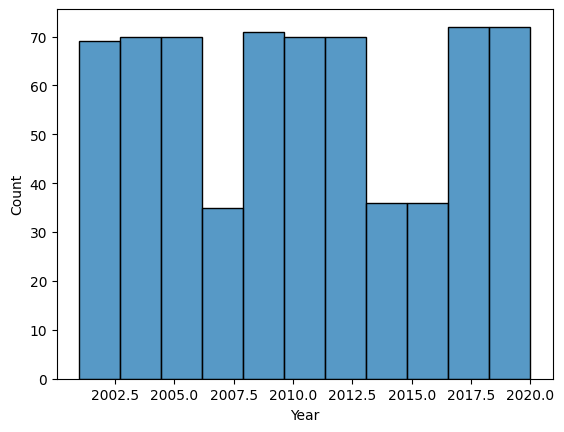

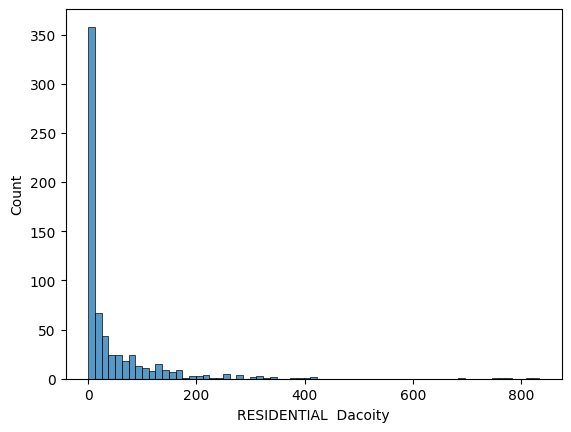

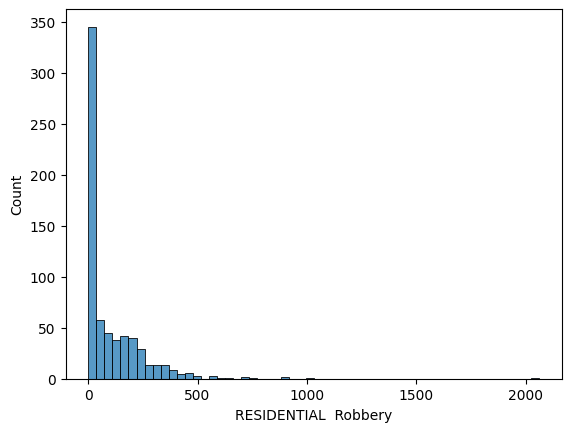

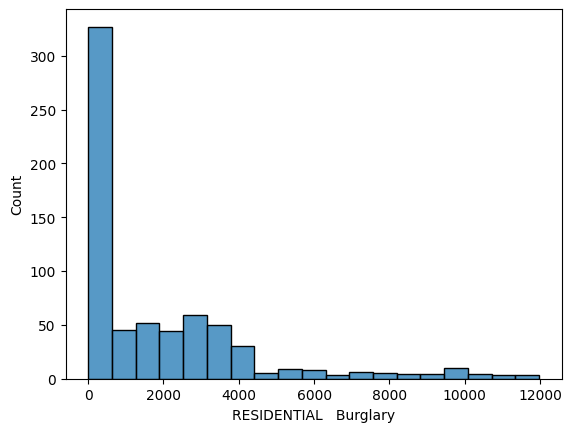

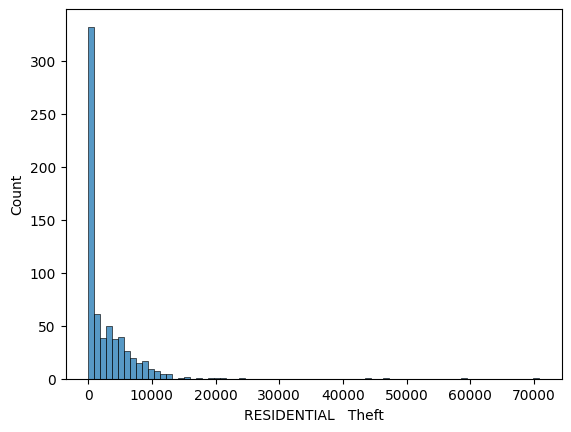

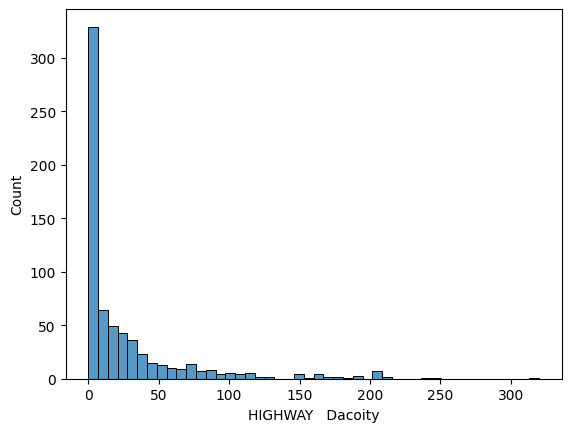

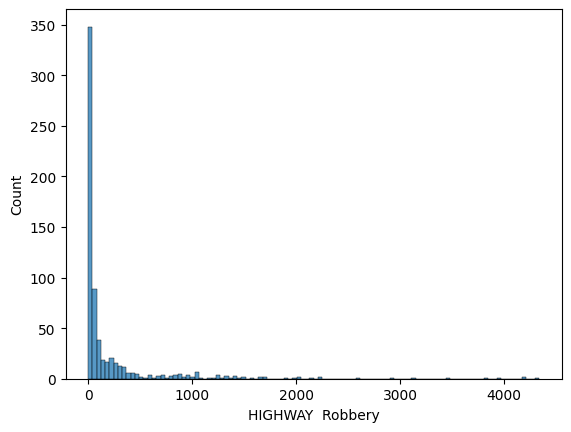

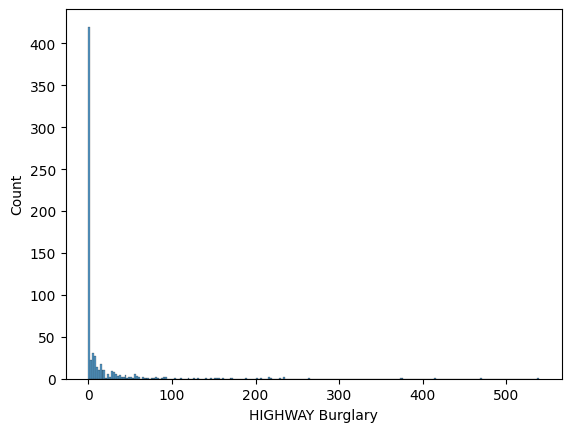

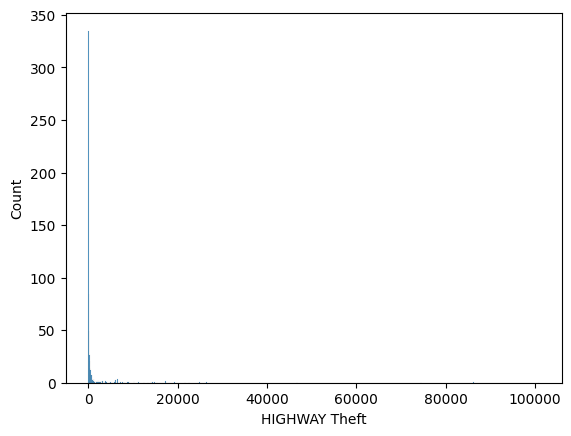

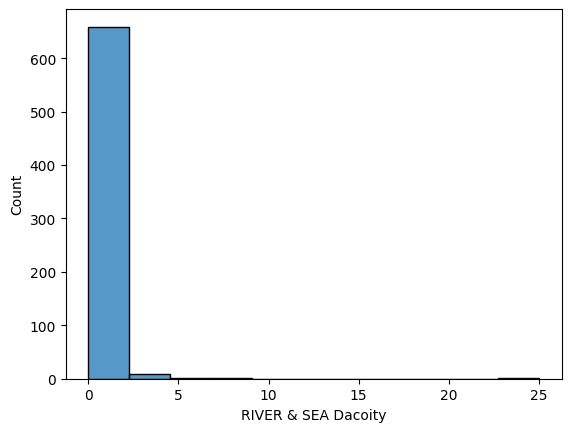

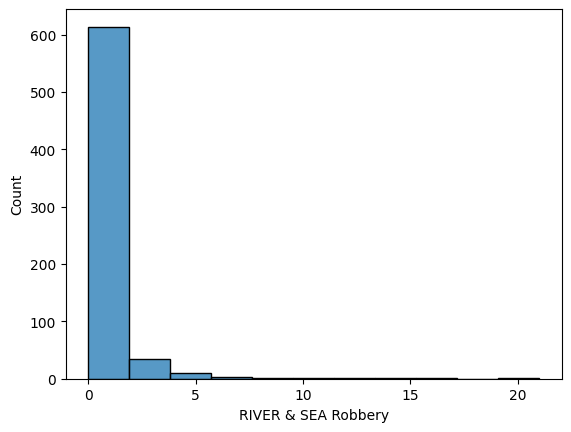

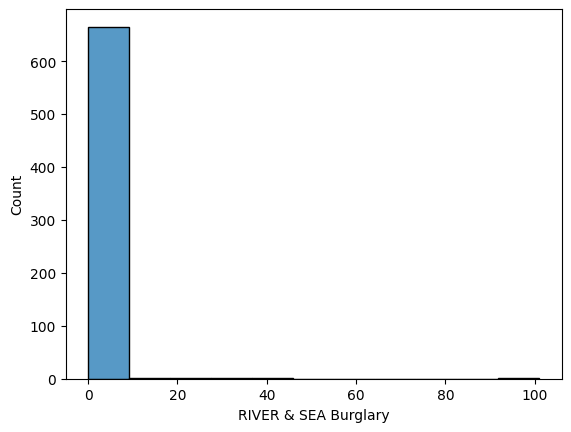

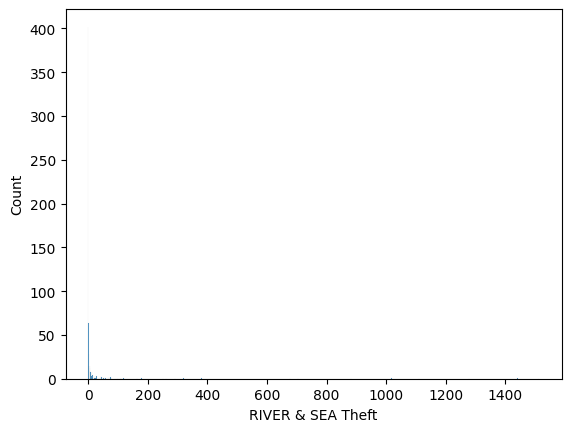

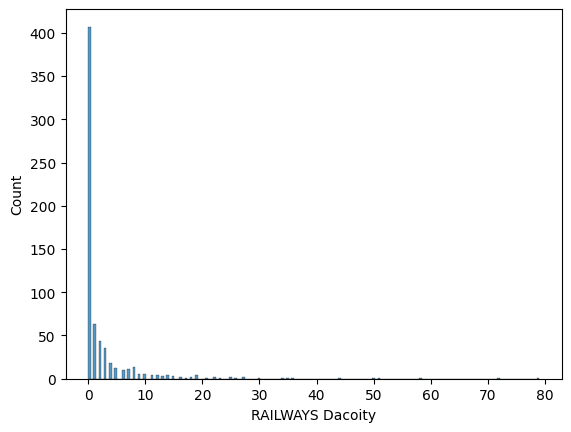

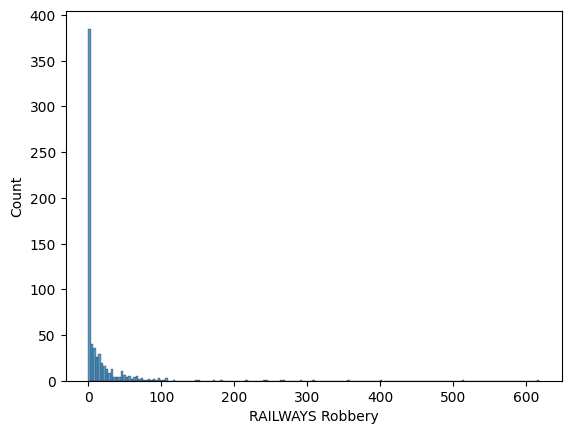

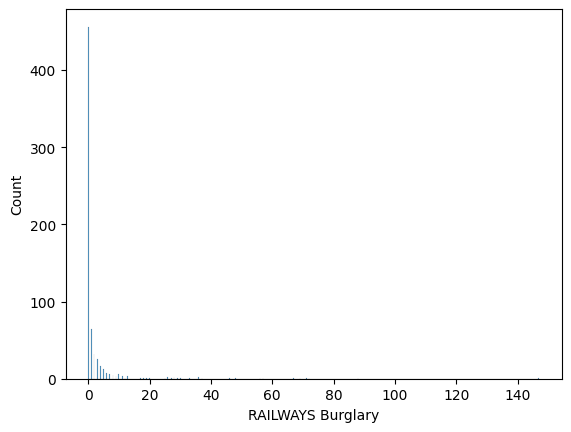

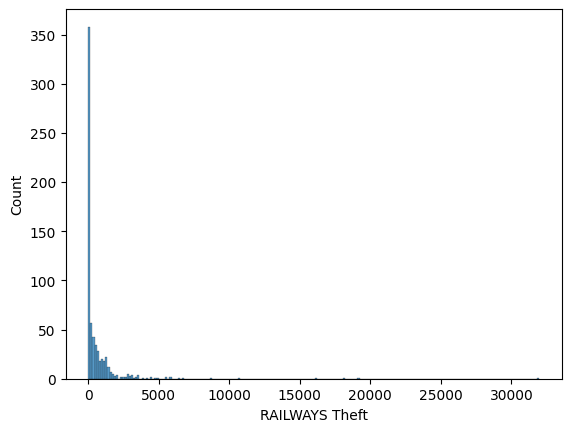

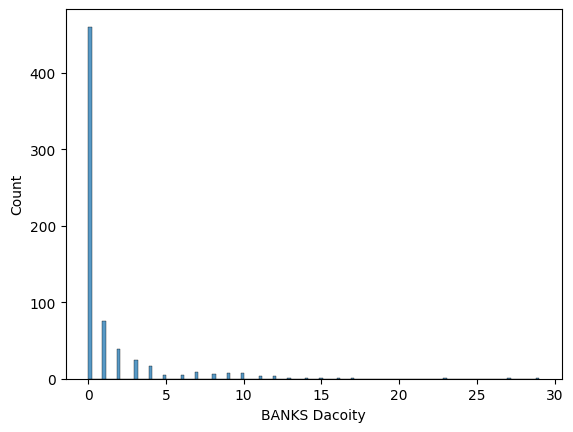

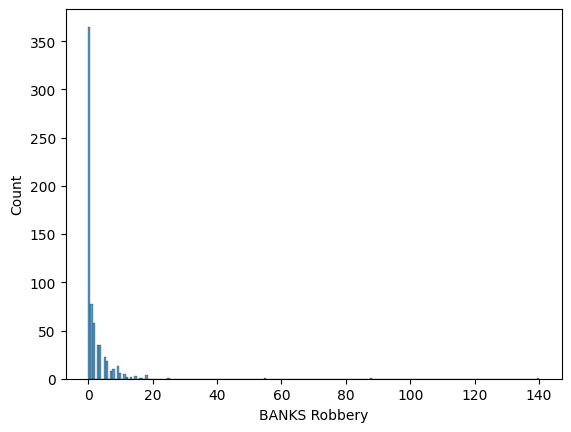

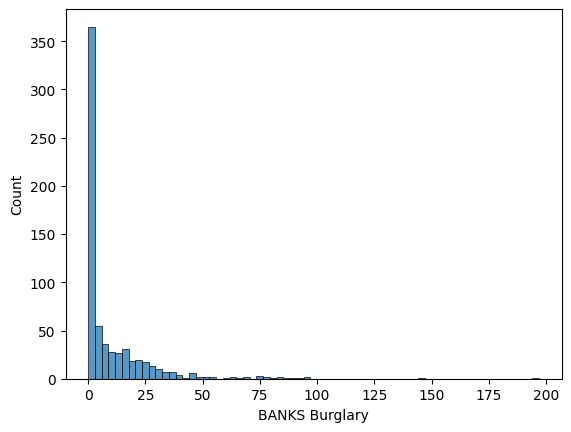

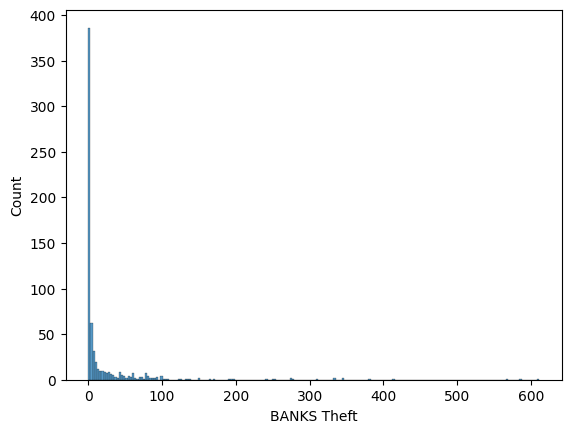

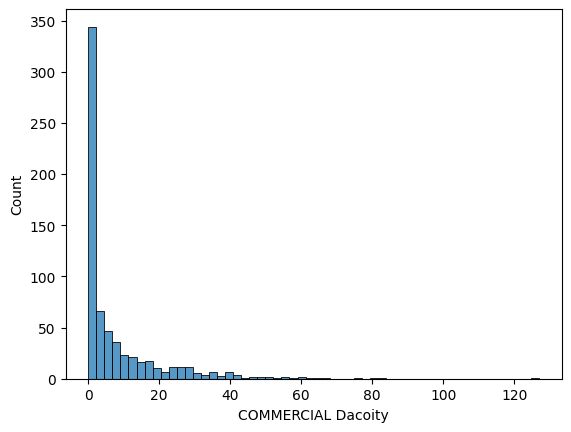

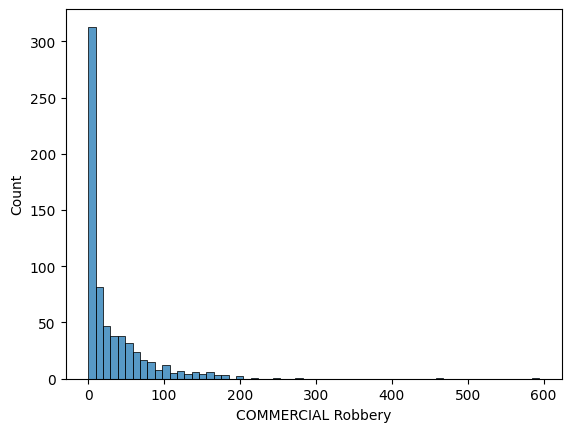

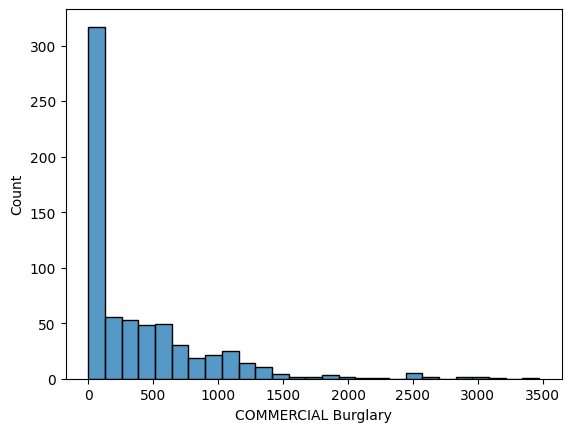

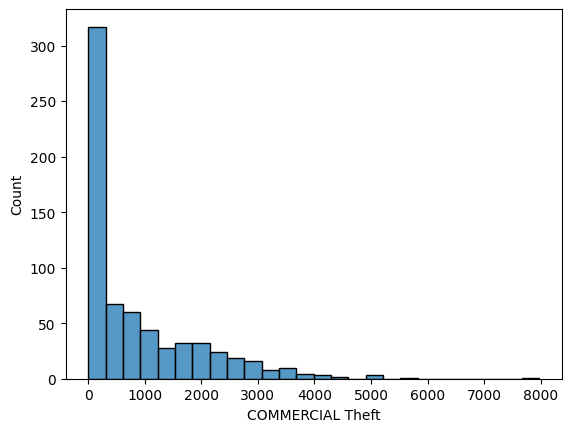

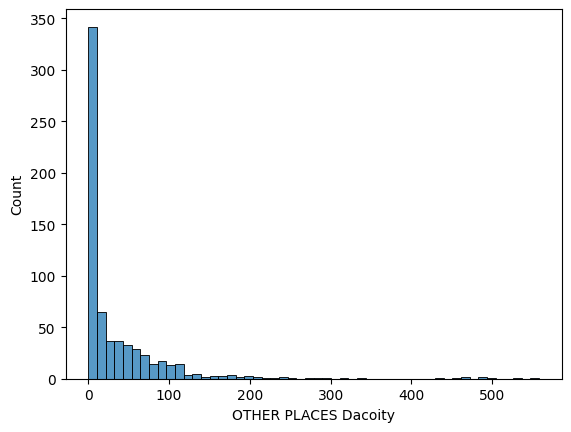

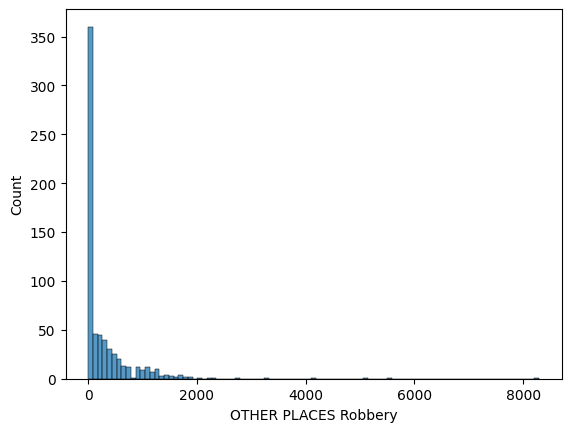

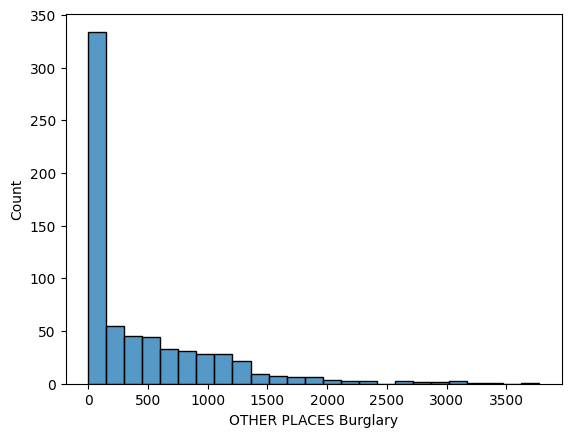

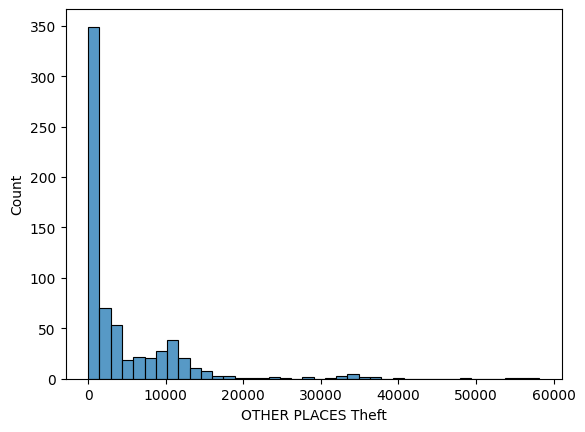

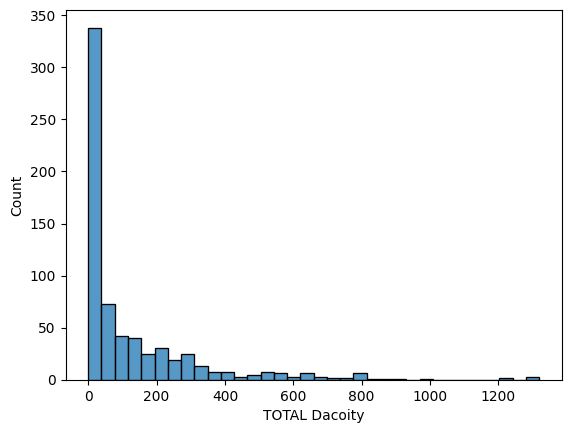

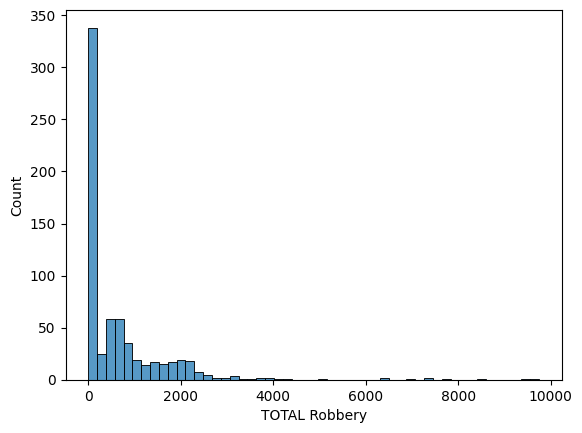

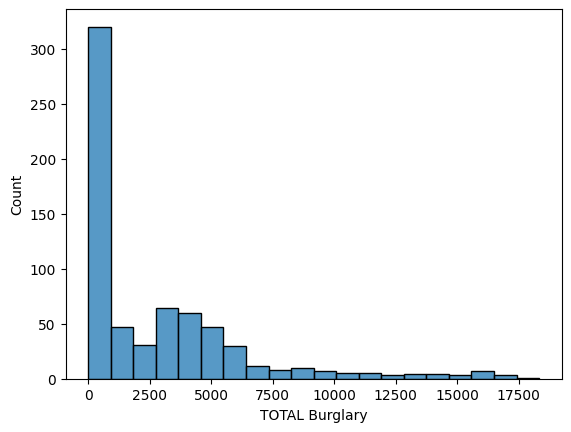

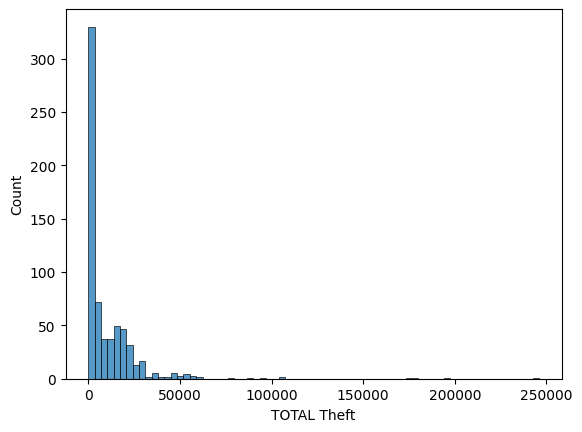

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data0.columns:
    if data0[column].dtypes != 'object':
        sns.histplot(data=data0, x=column)
        plt.show()


# Spread of data

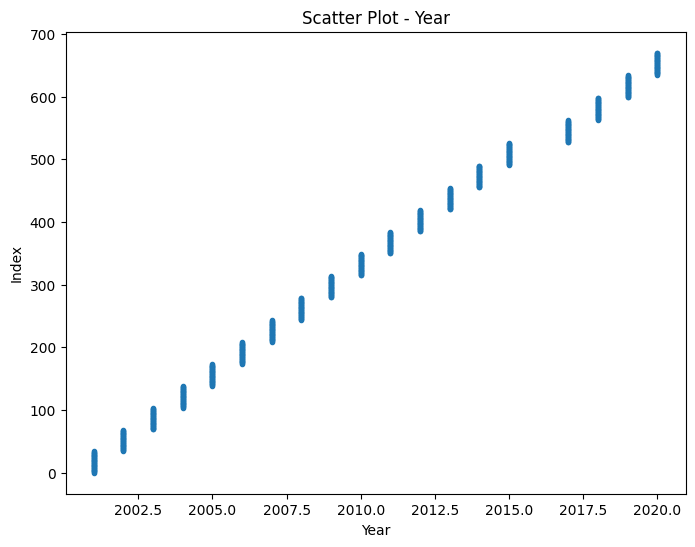

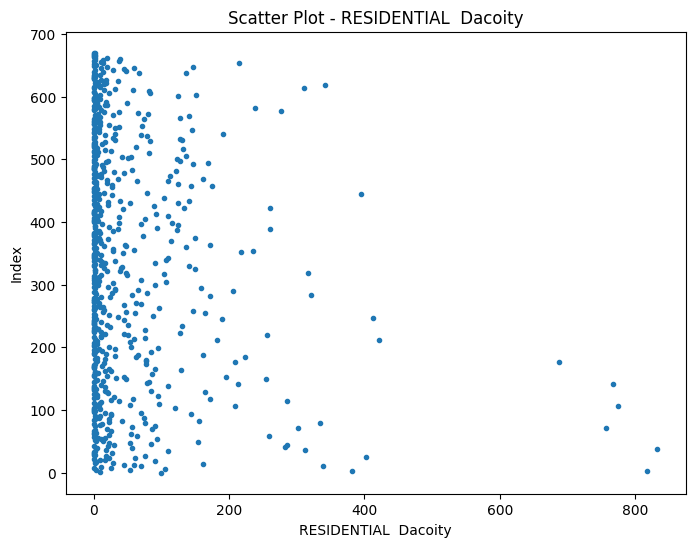

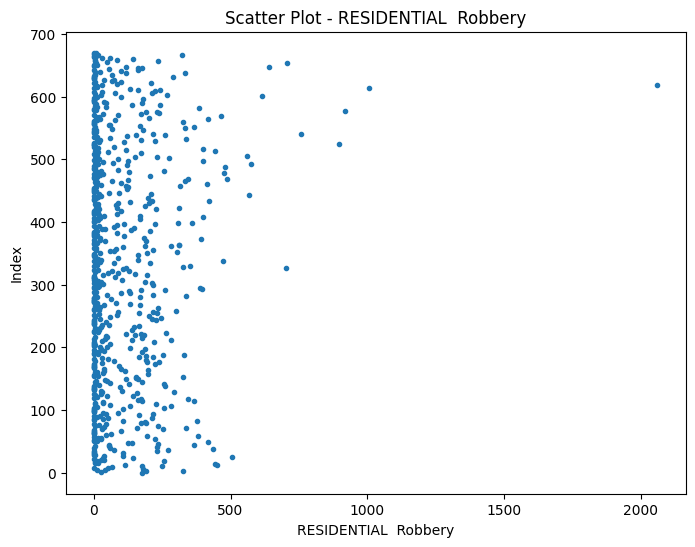

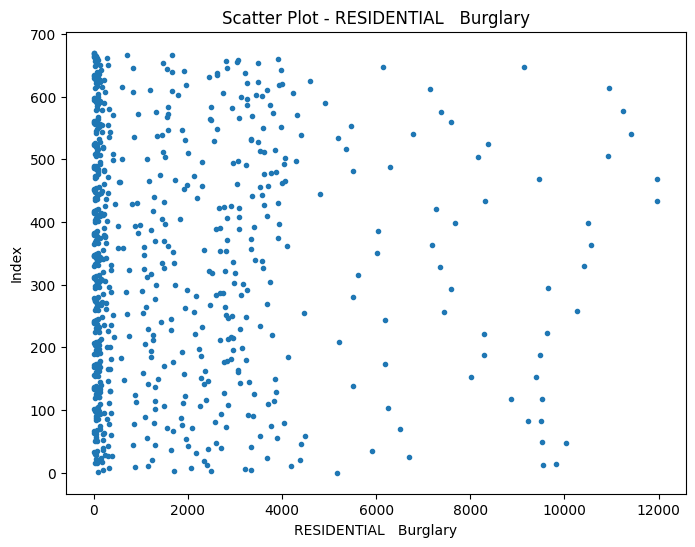

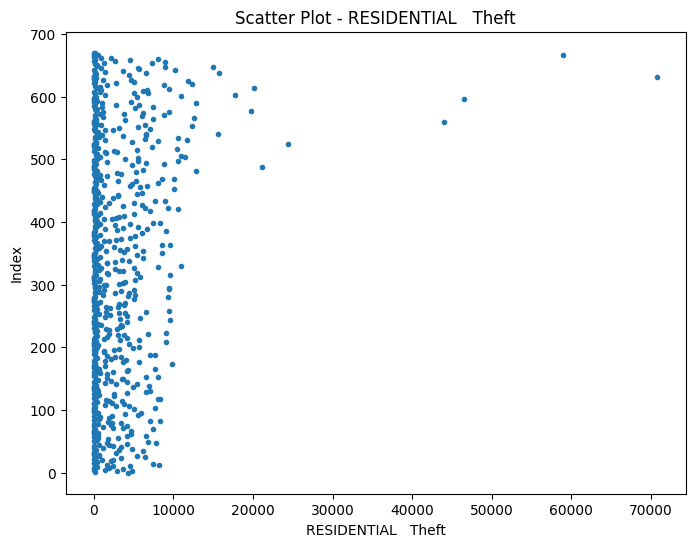

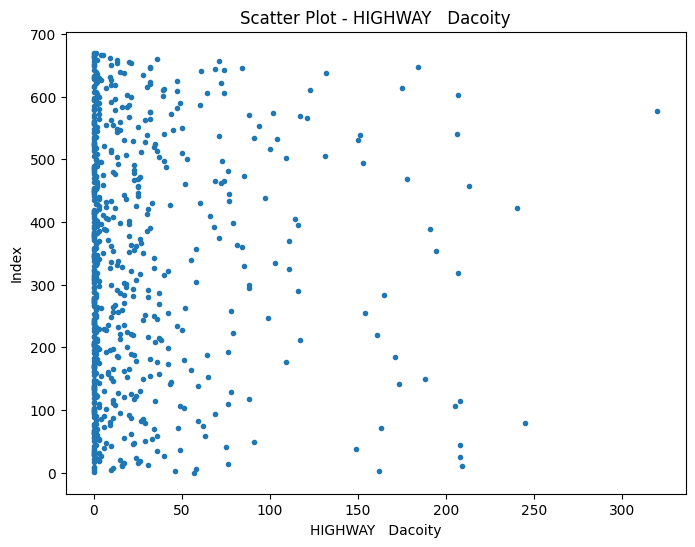

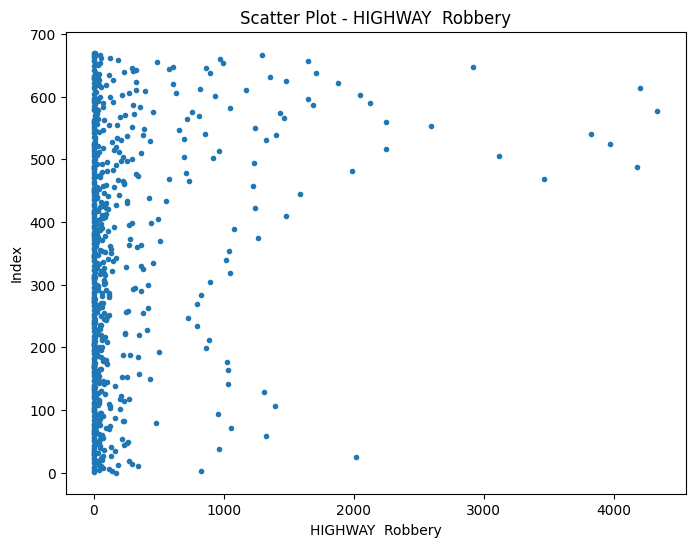

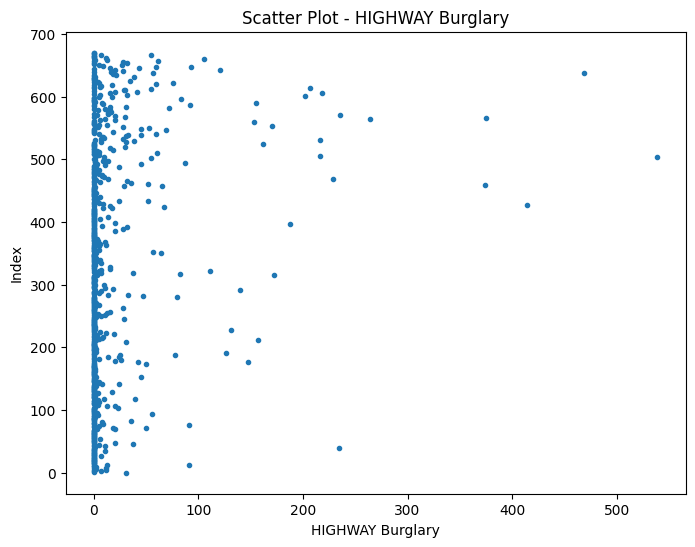

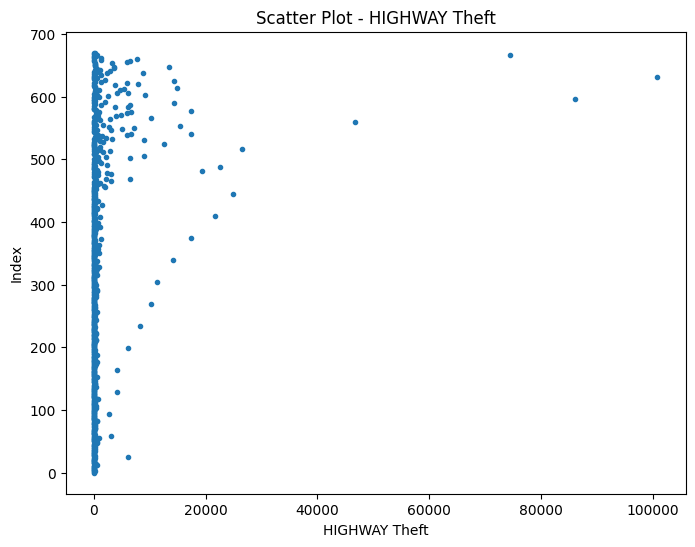

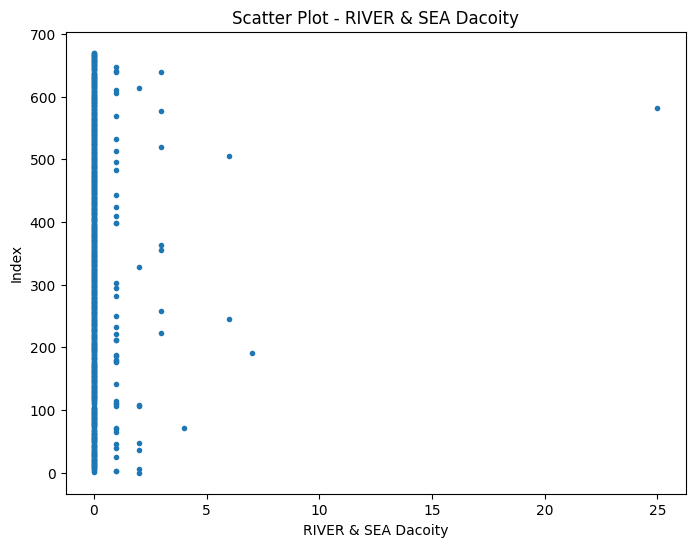

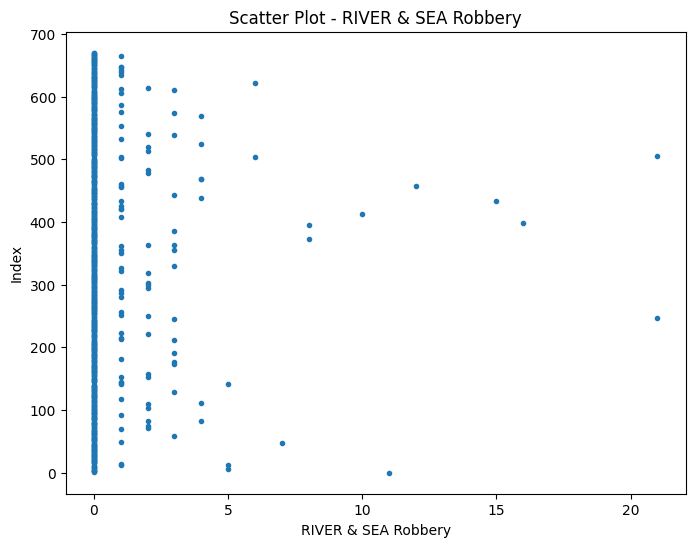

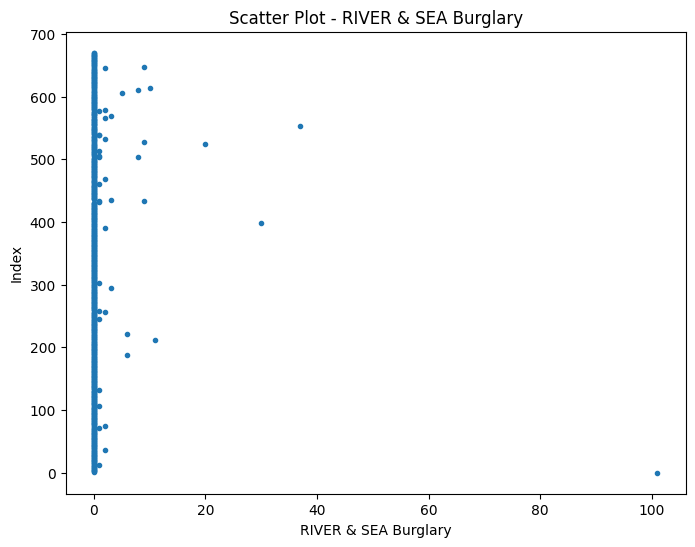

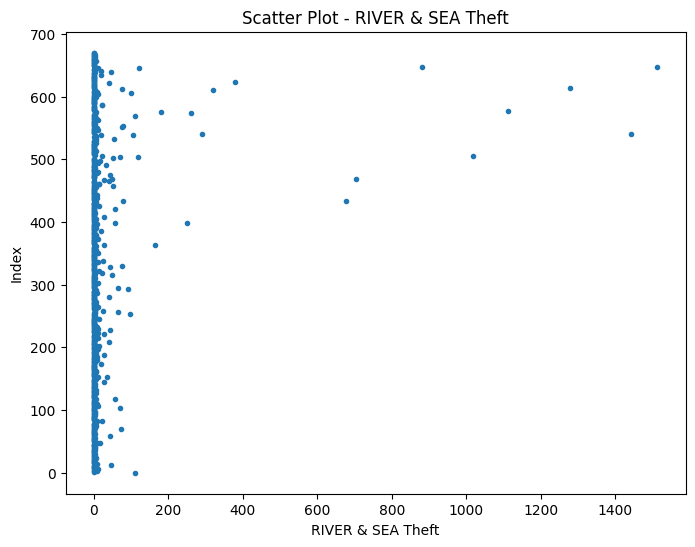

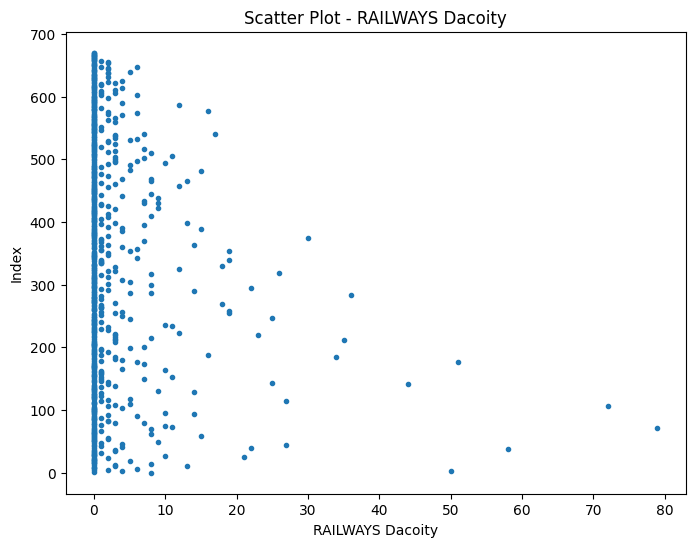

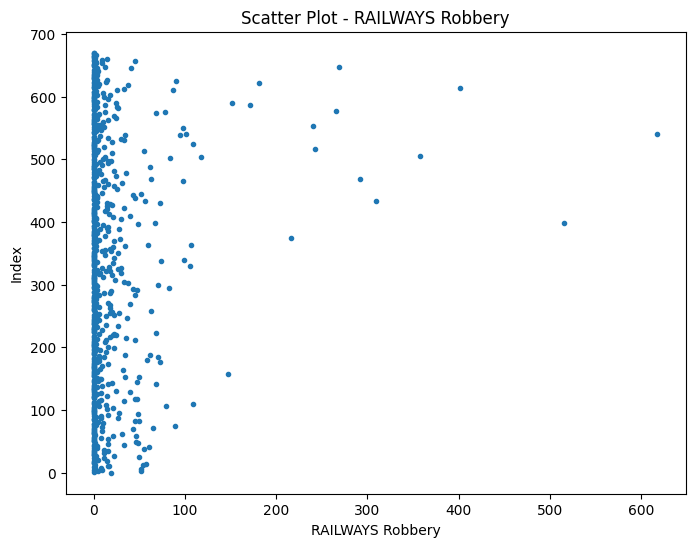

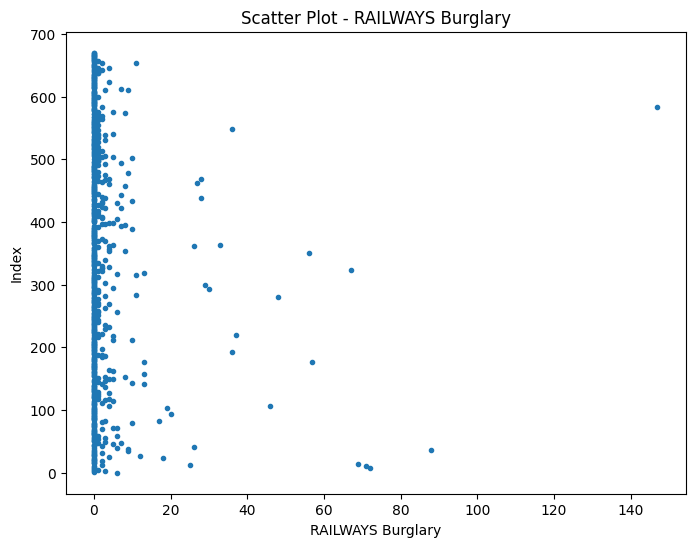

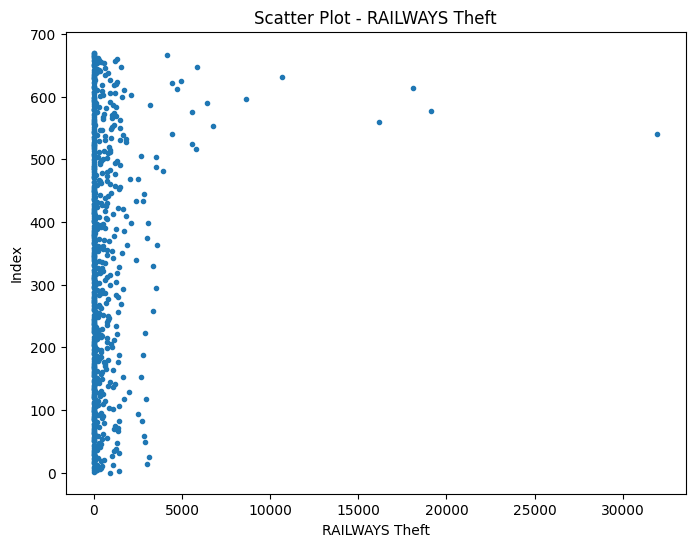

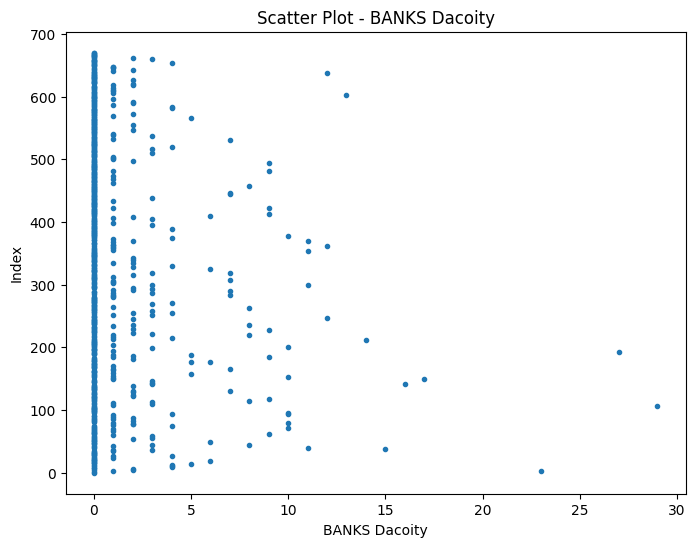

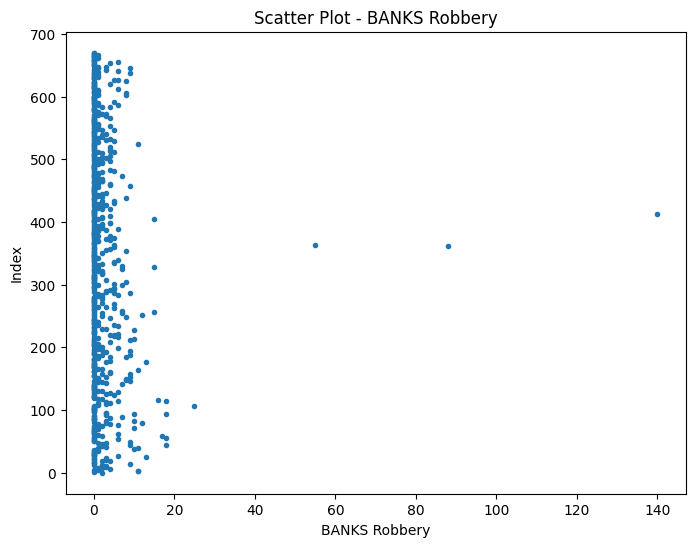

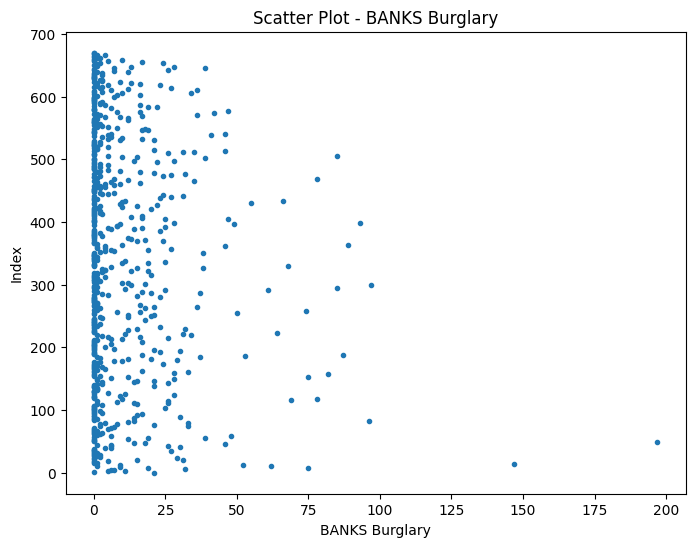

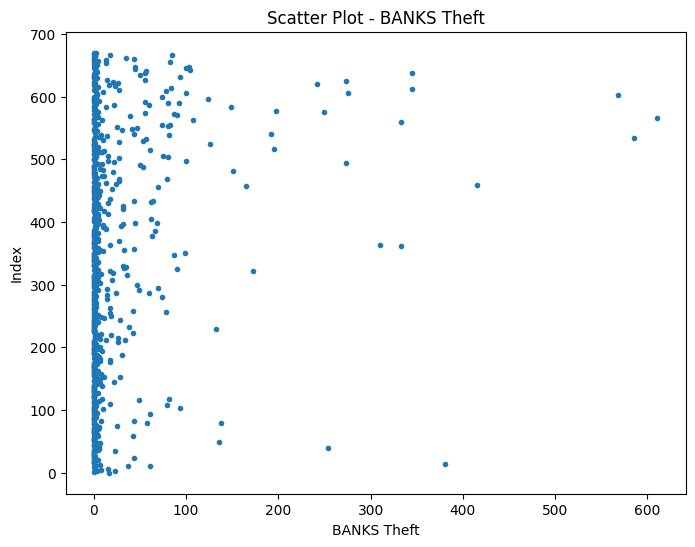

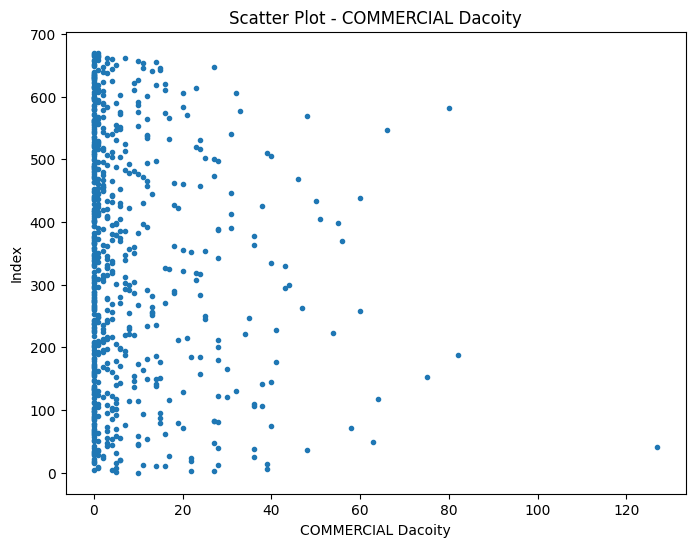

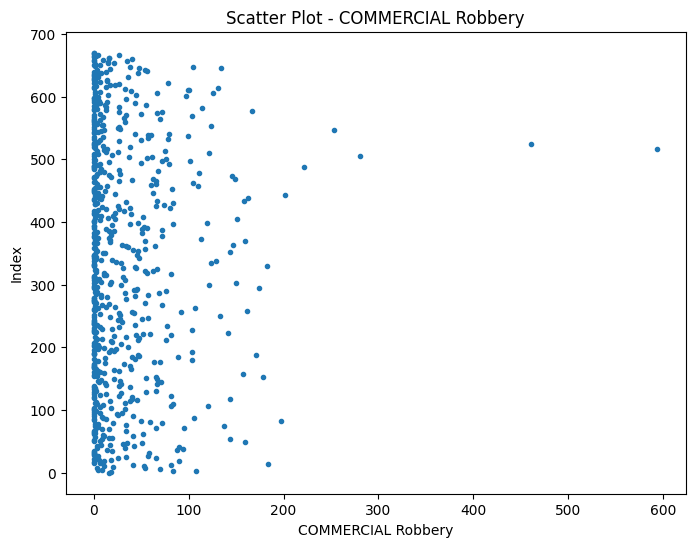

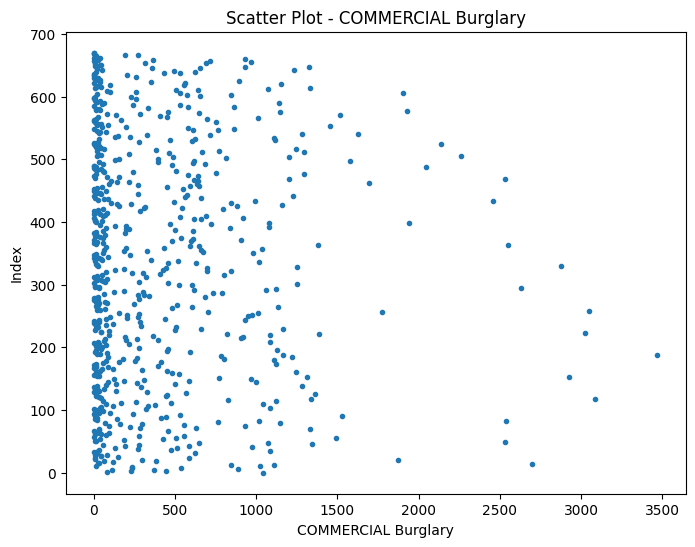

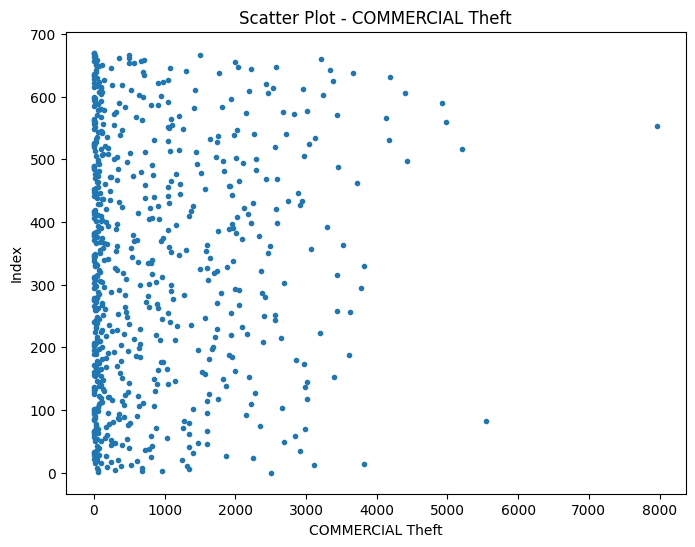

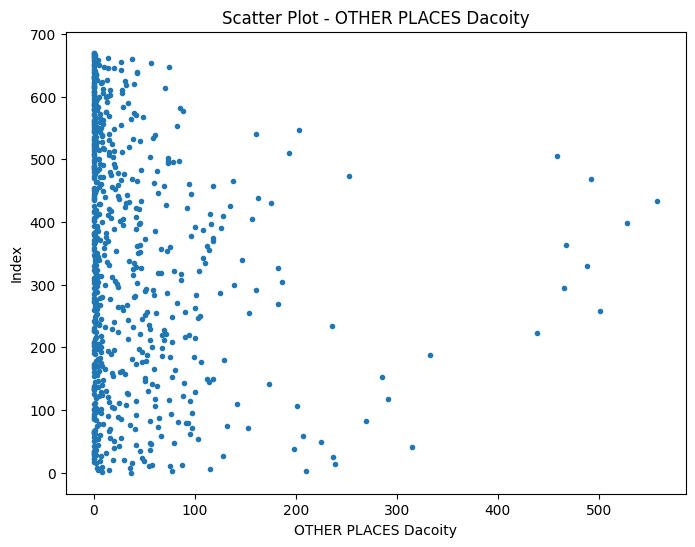

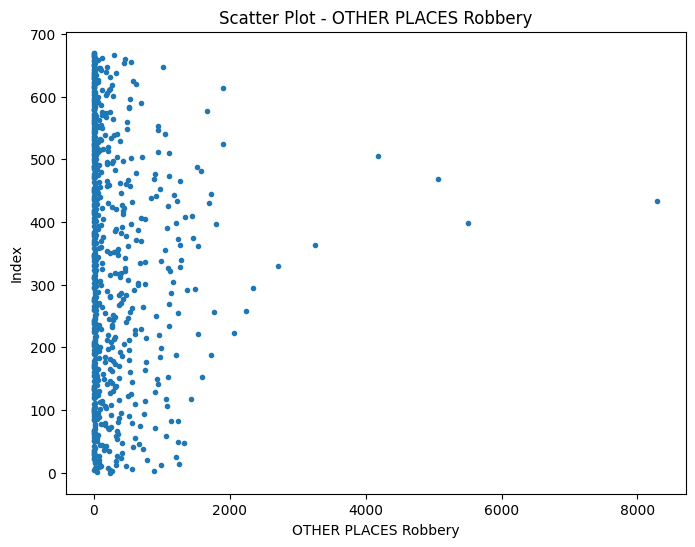

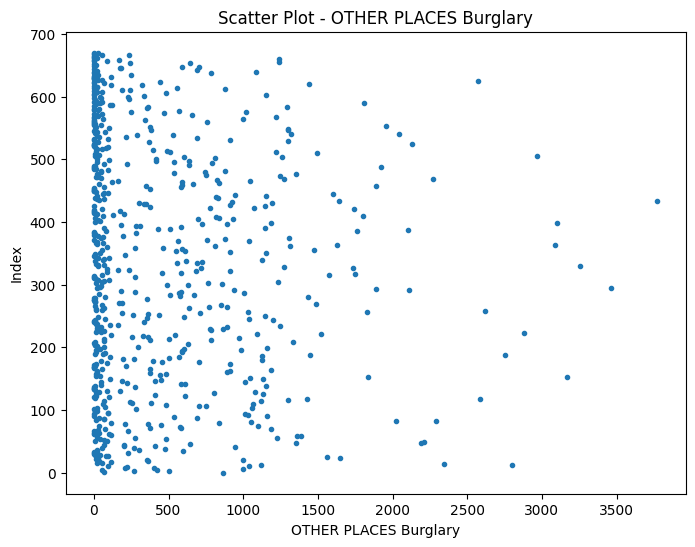

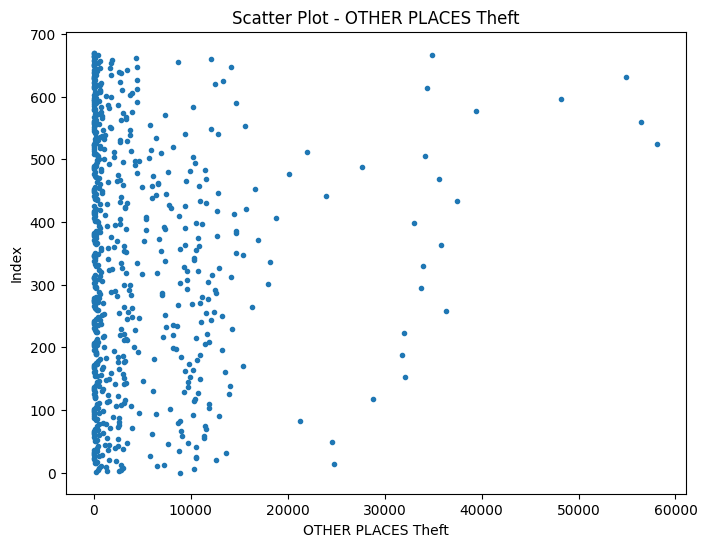

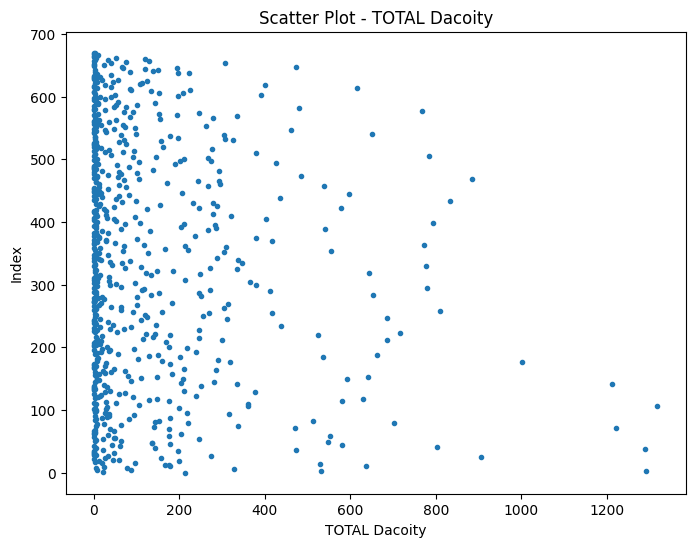

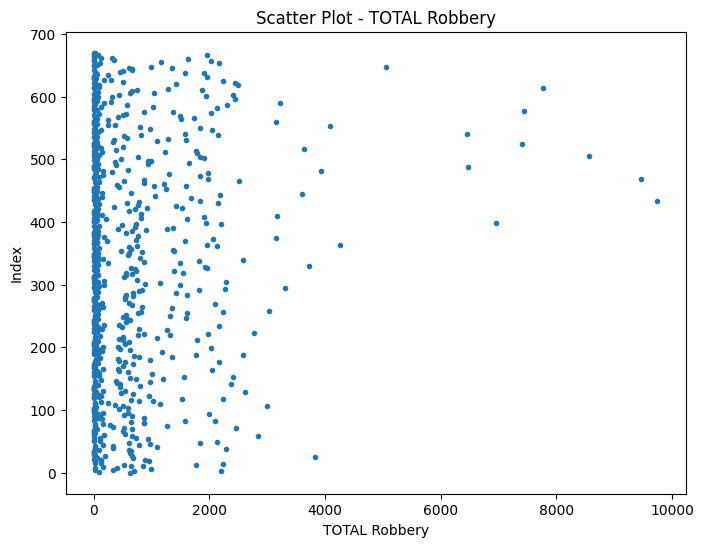

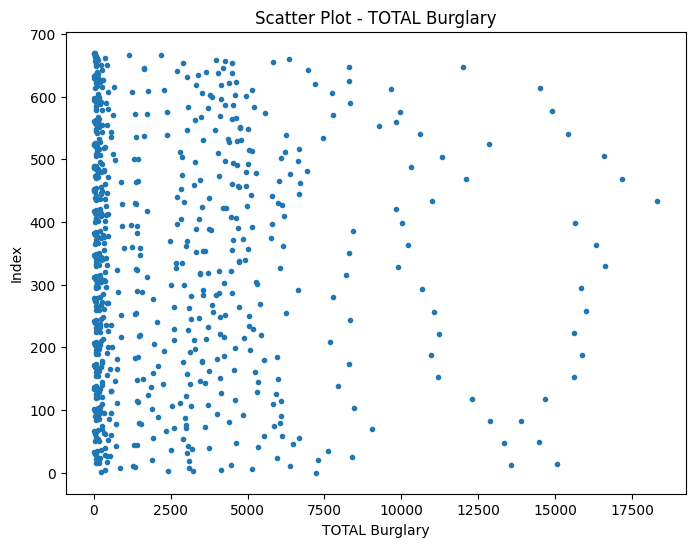

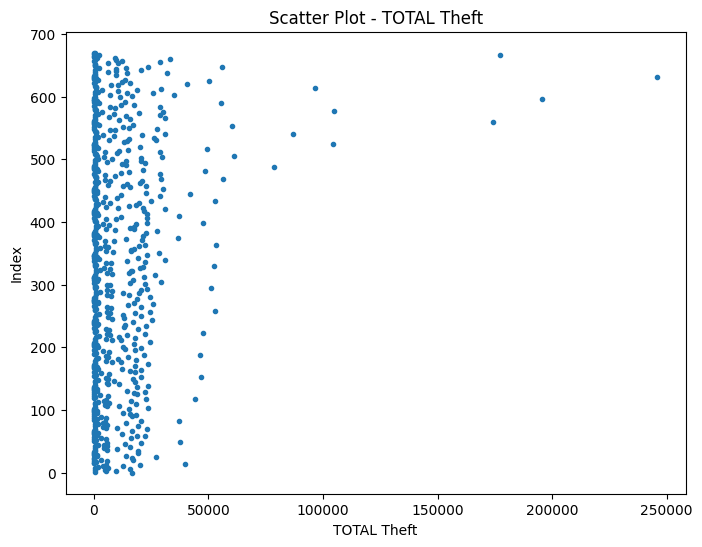

In [6]:
import matplotlib.pyplot as plt

for column in data0.columns:
    if data0[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(data0[column], range(len(data0)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()

# Encoding 

In [7]:
data1 =data0.copy()

In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data1['STATE'] = label.fit_transform(data1['STATE'])

In [9]:
data2 = data1.copy()

# Normalisation of data

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer

In [11]:
ss = RobustScaler()
scaled= pd.DataFrame(ss.fit_transform(data2))

# after Normalisation spread of data

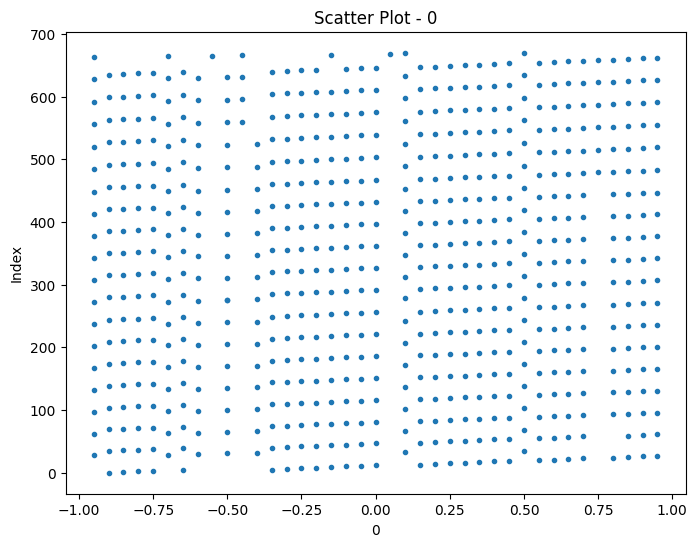

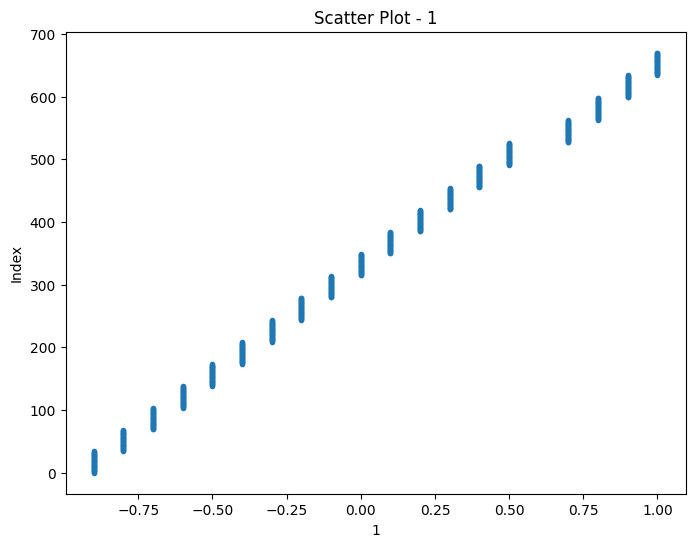

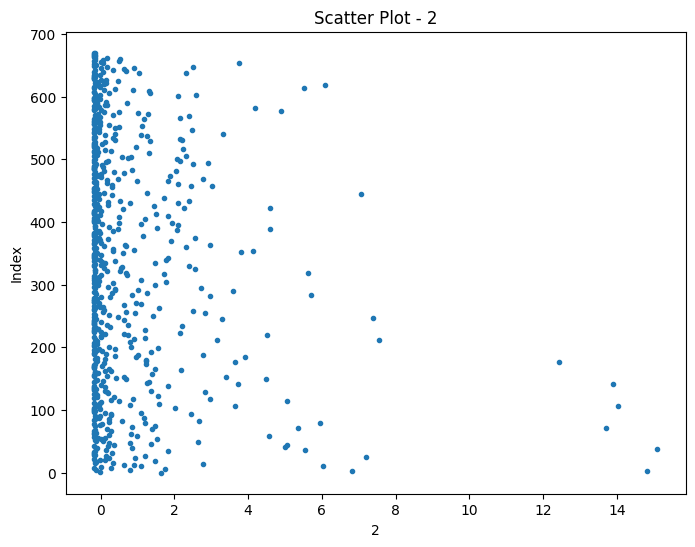

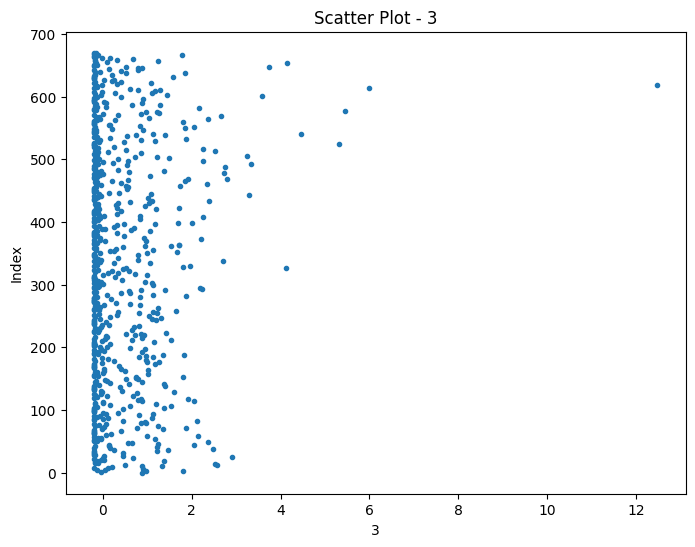

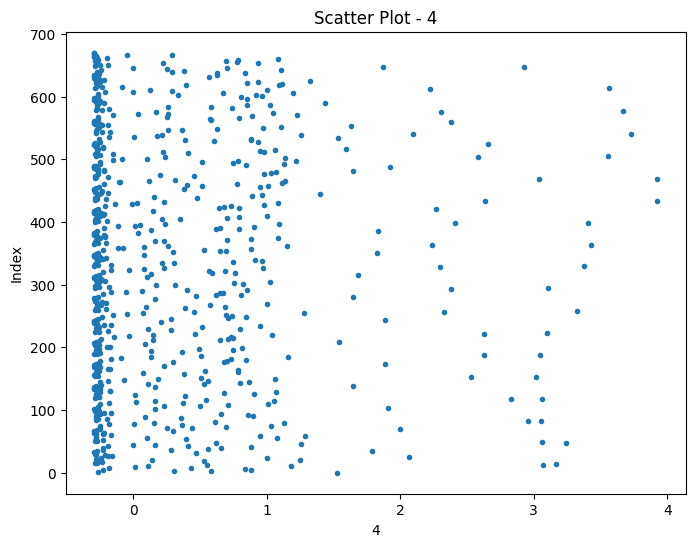

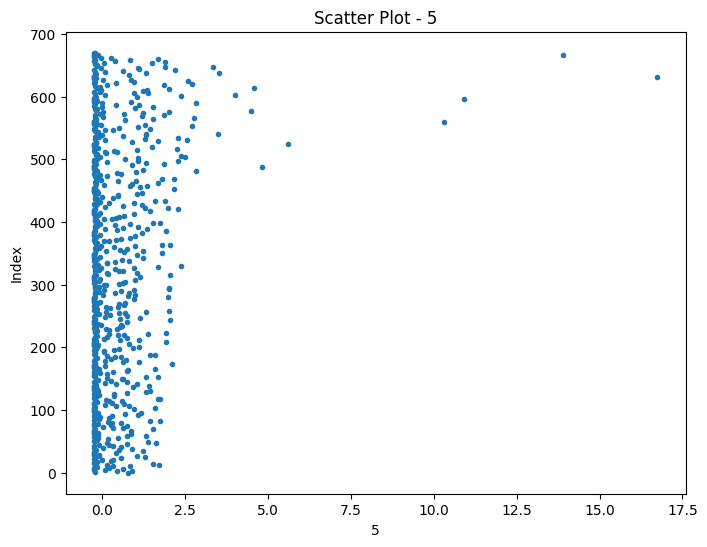

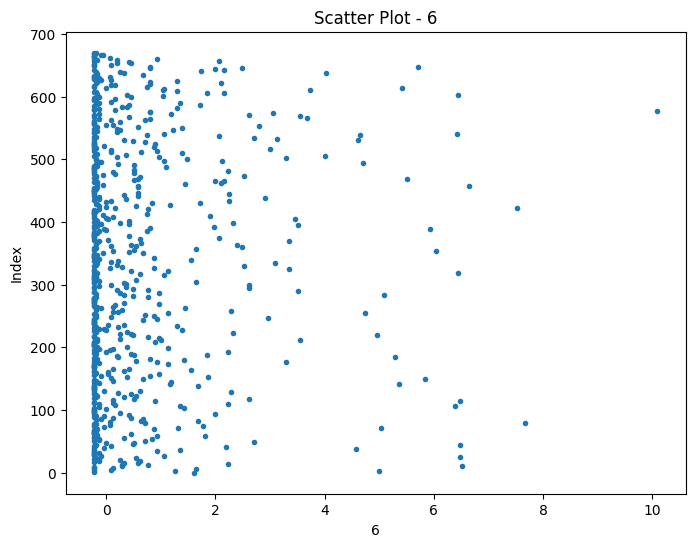

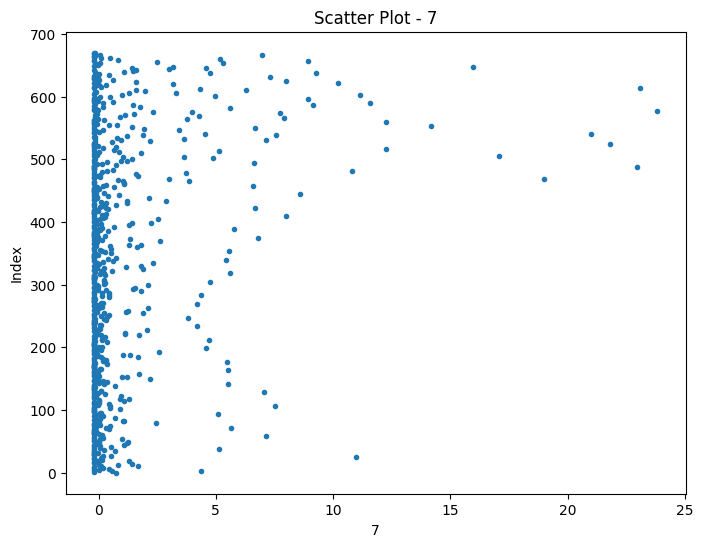

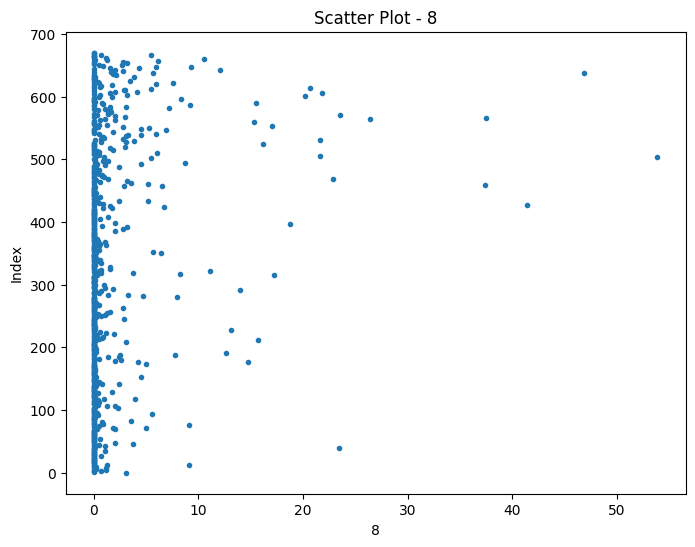

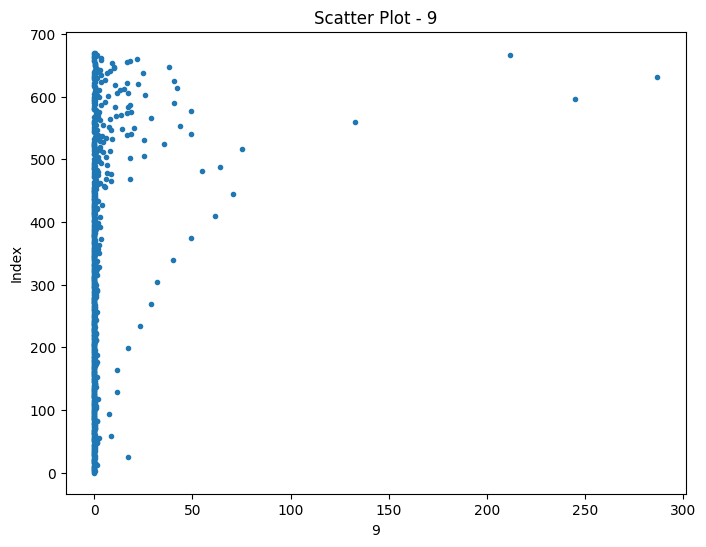

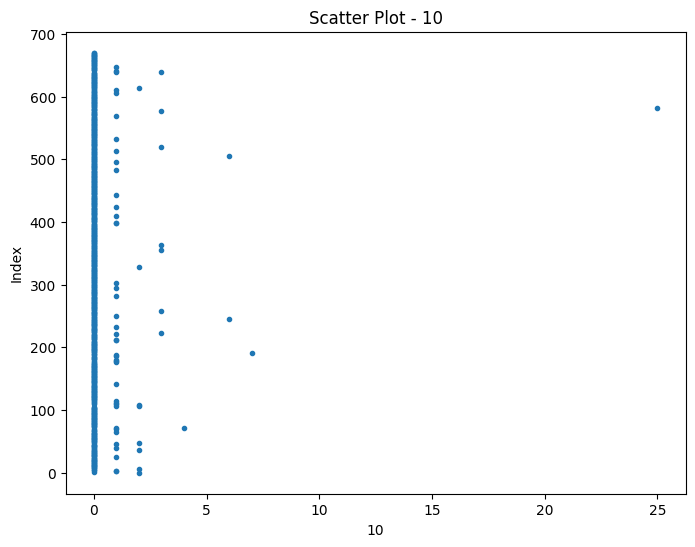

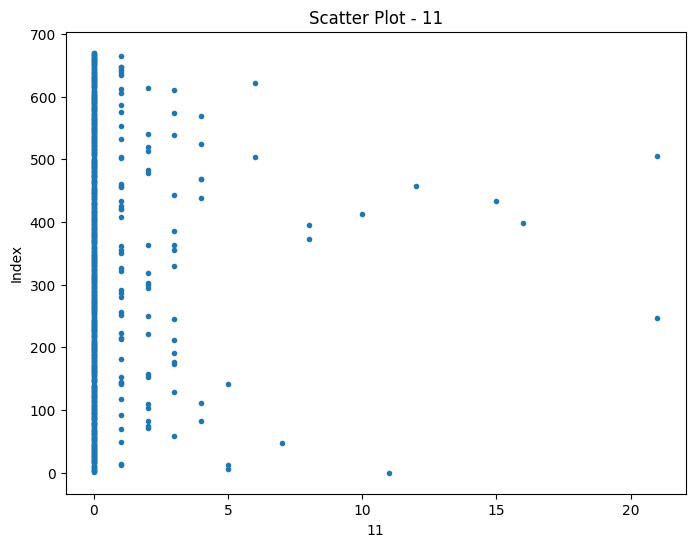

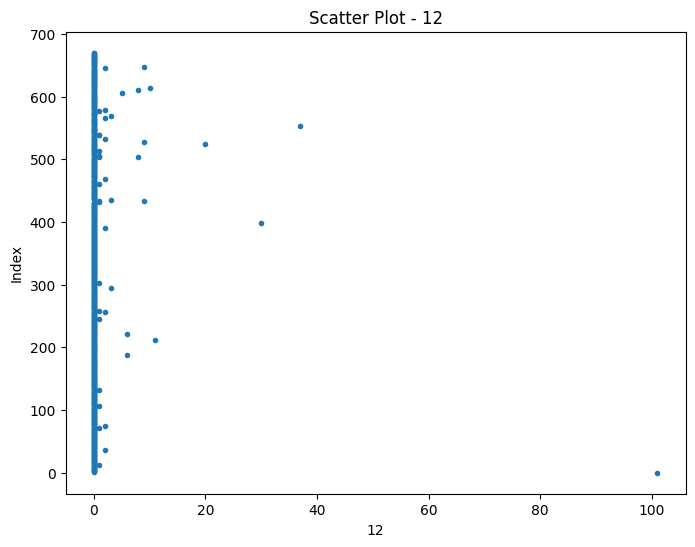

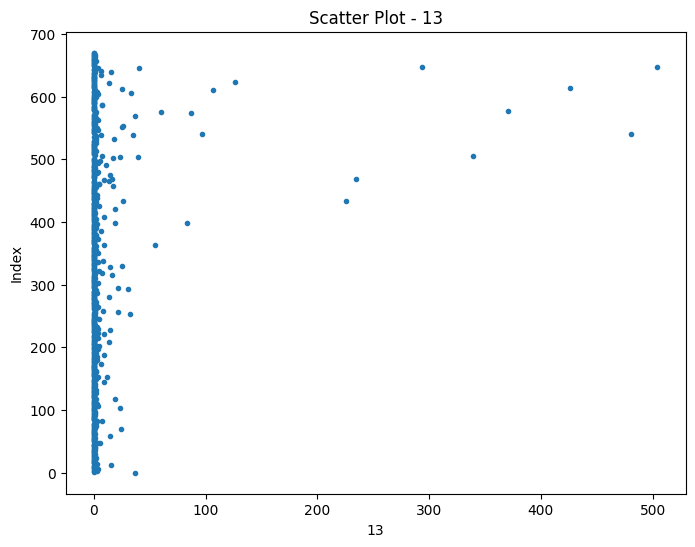

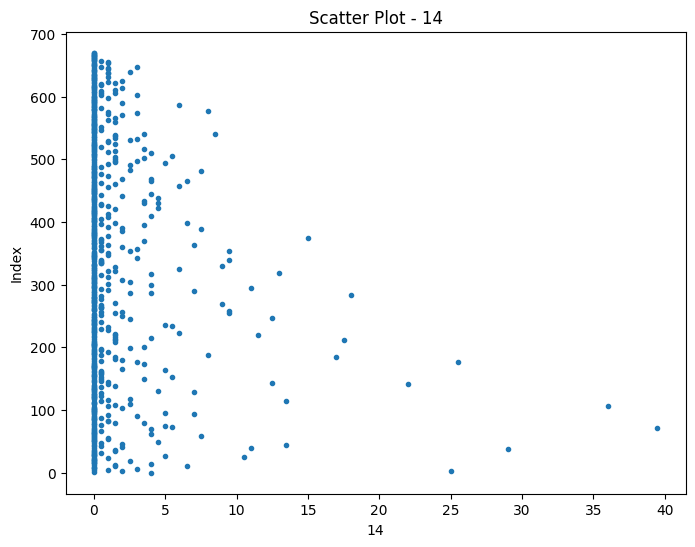

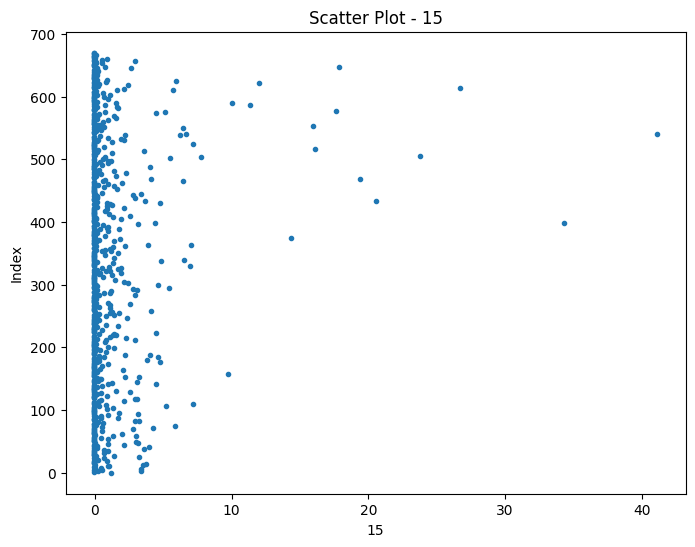

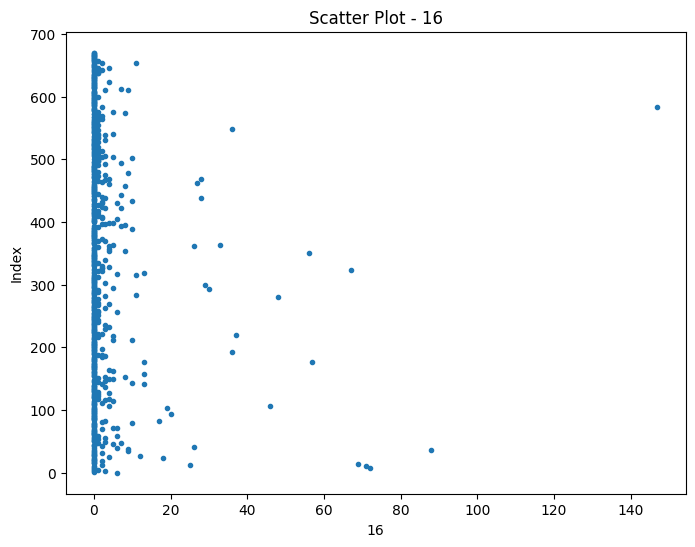

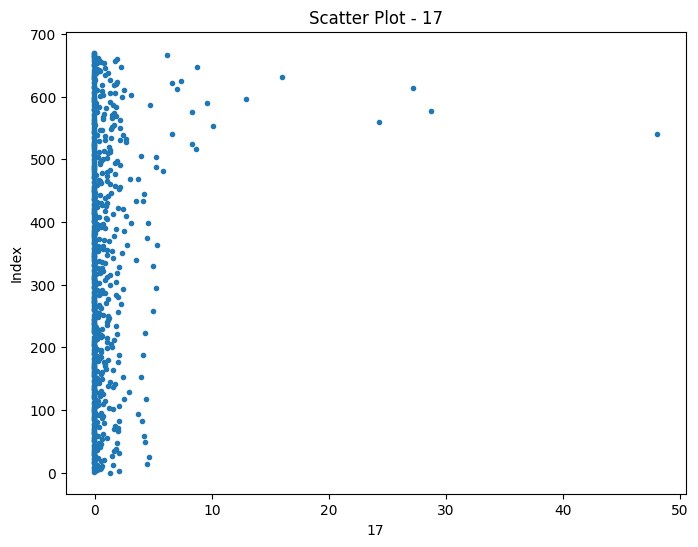

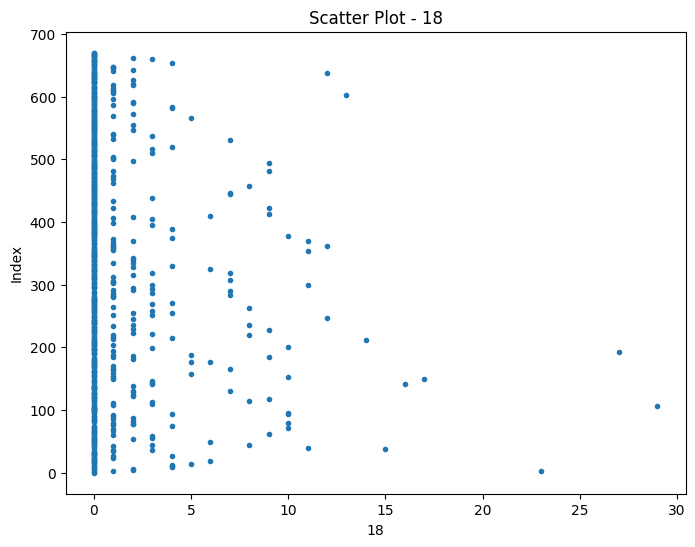

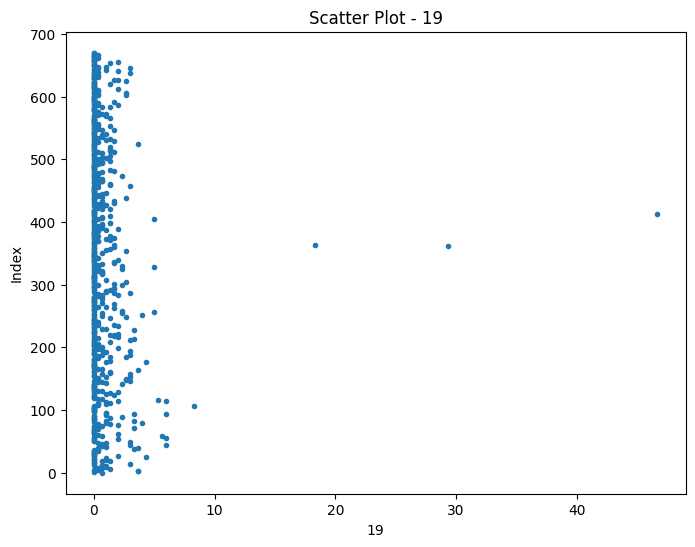

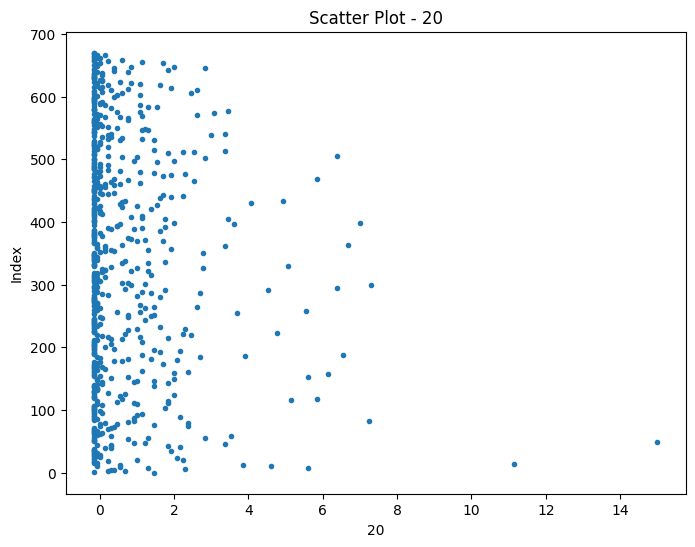

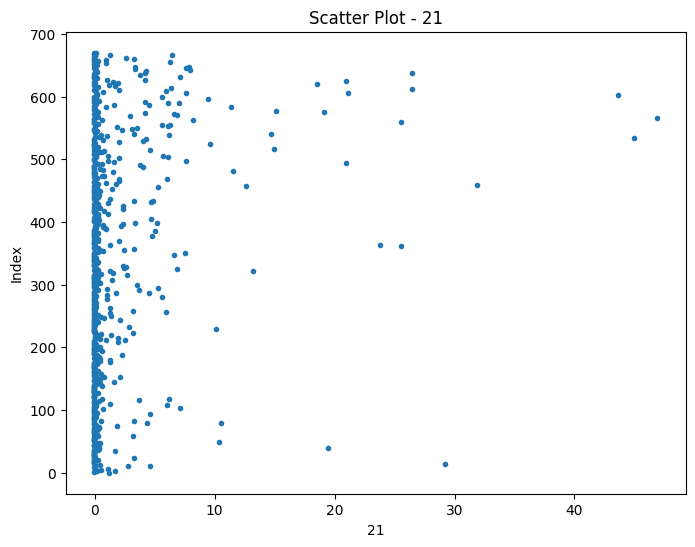

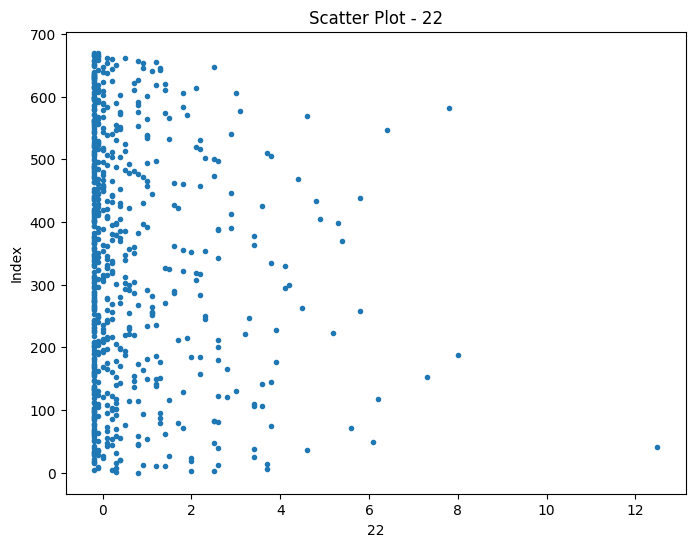

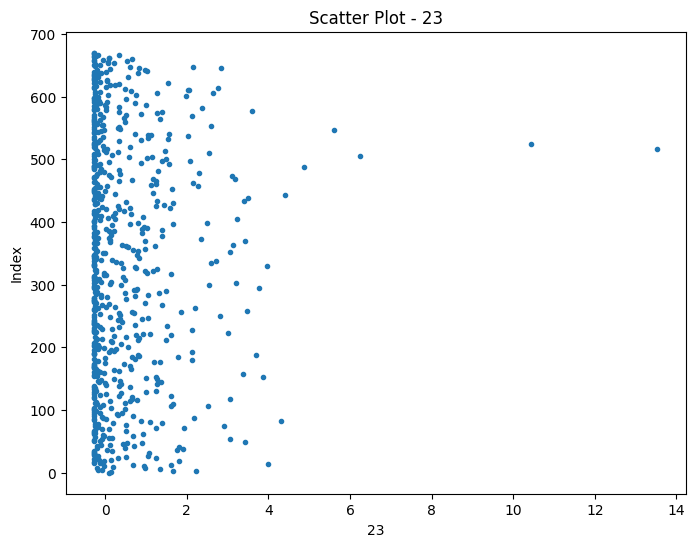

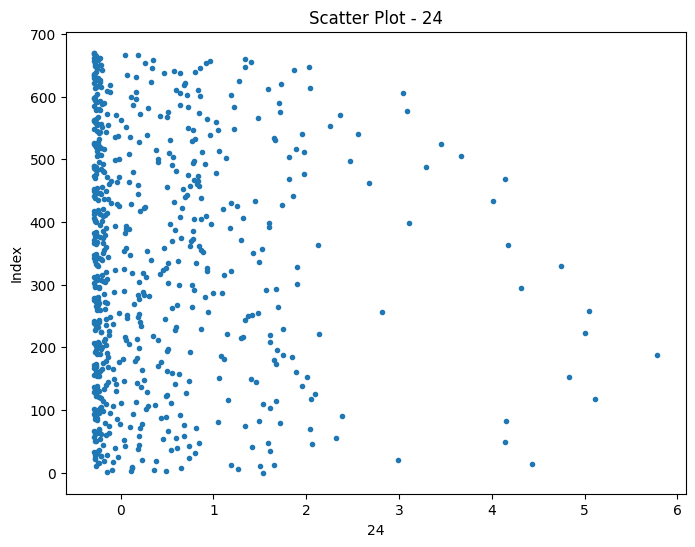

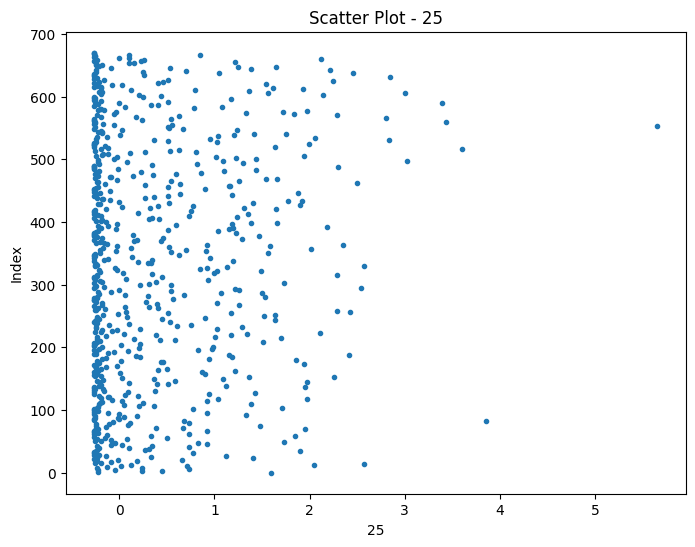

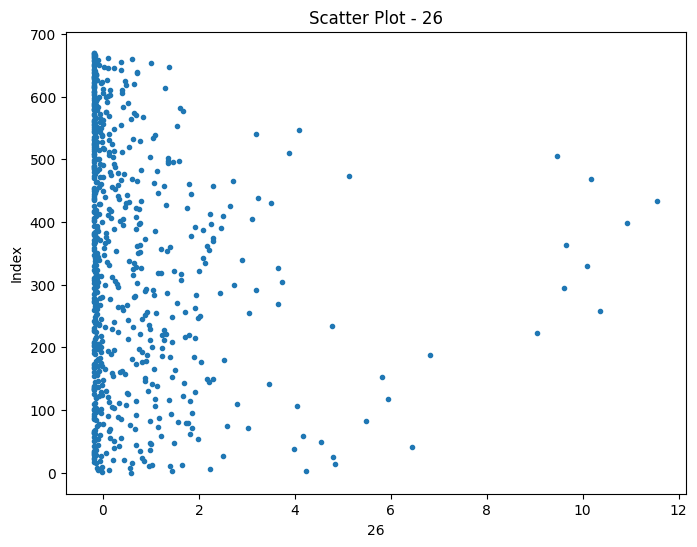

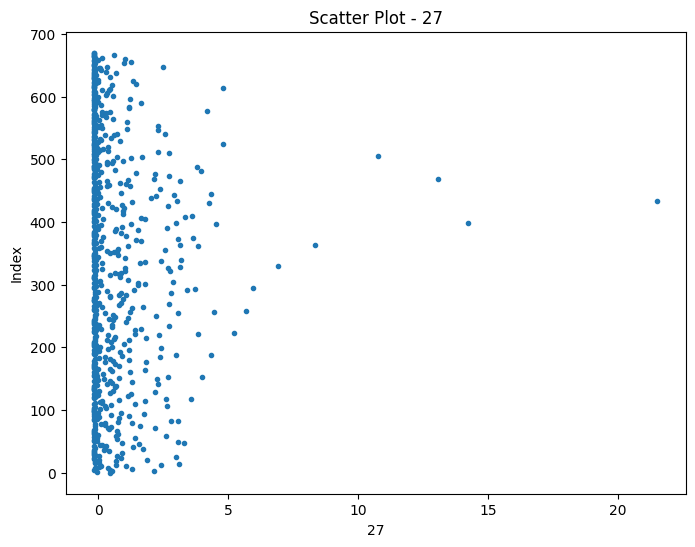

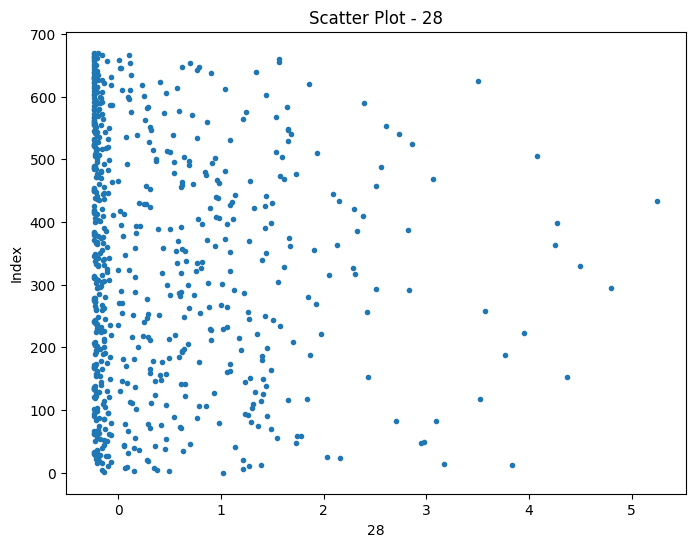

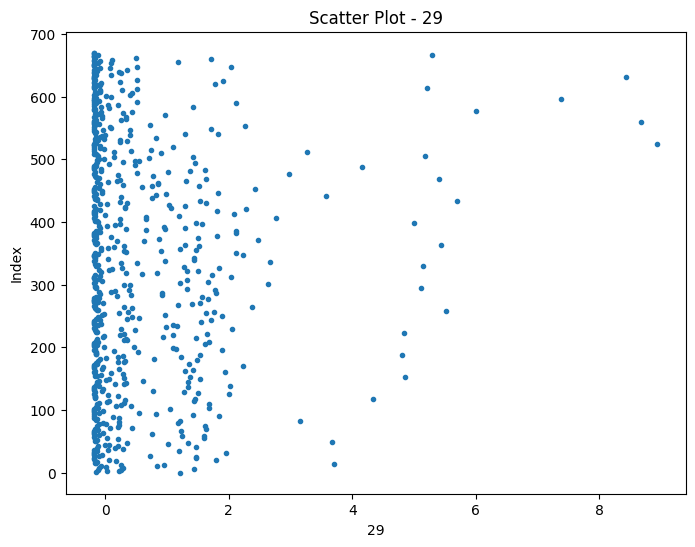

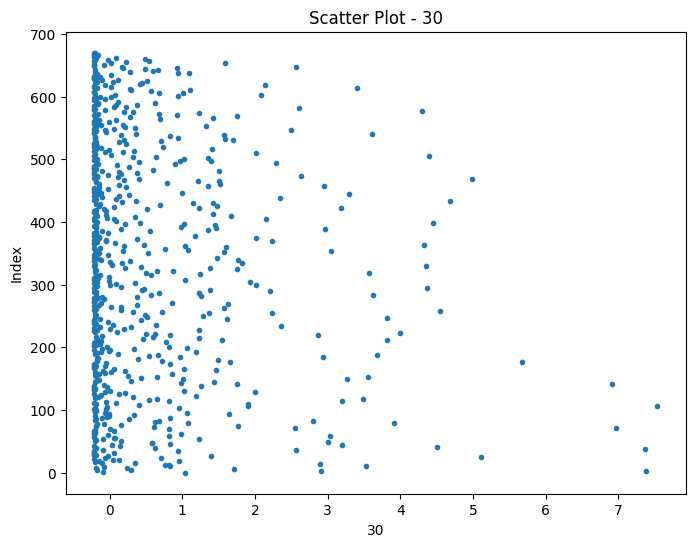

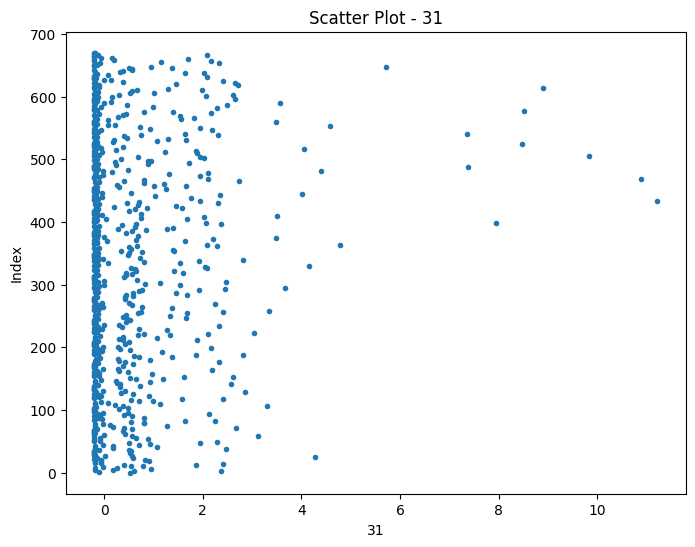

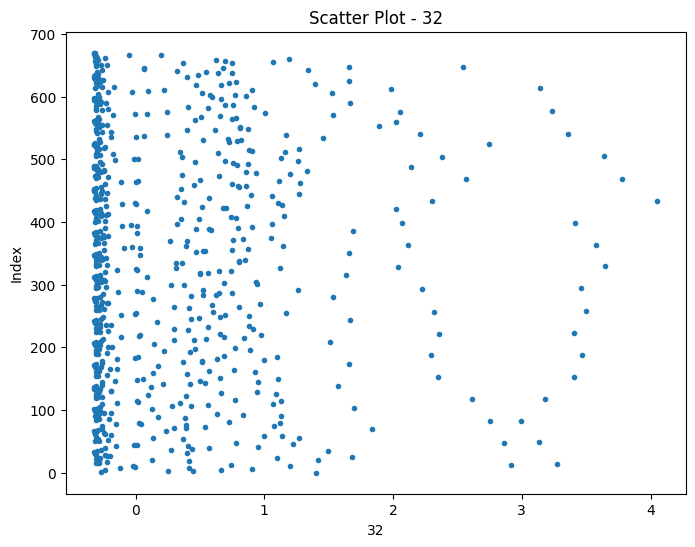

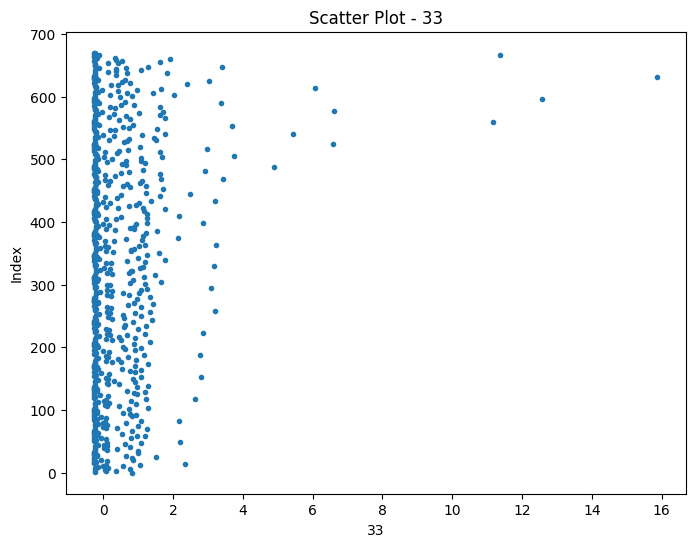

In [12]:

for column in scaled.columns:
    if scaled[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(scaled[column], range(len(scaled)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()

# Elbow Method

In [13]:
from sklearn.cluster import KMeans

In [14]:
elbow = pd.DataFrame()

for i in range(1,15):
    kmean = KMeans(n_clusters=i, random_state=333)
    model = kmean.fit(scaled)
    elbow.at[i,'k'] = i
    elbow.at[i, 'inertia'] = round(model.inertia_)/10000000
print(elbow)
    

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


       k   inertia
1    1.0  0.158710
2    2.0  0.056791
3    3.0  0.037792
4    4.0  0.030749
5    5.0  0.025614
6    6.0  0.021052
7    7.0  0.017475
8    8.0  0.015447
9    9.0  0.014015
10  10.0  0.012767
11  11.0  0.011659
12  12.0  0.010707
13  13.0  0.010044
14  14.0  0.009251


Text(0, 0.5, 'inertia')

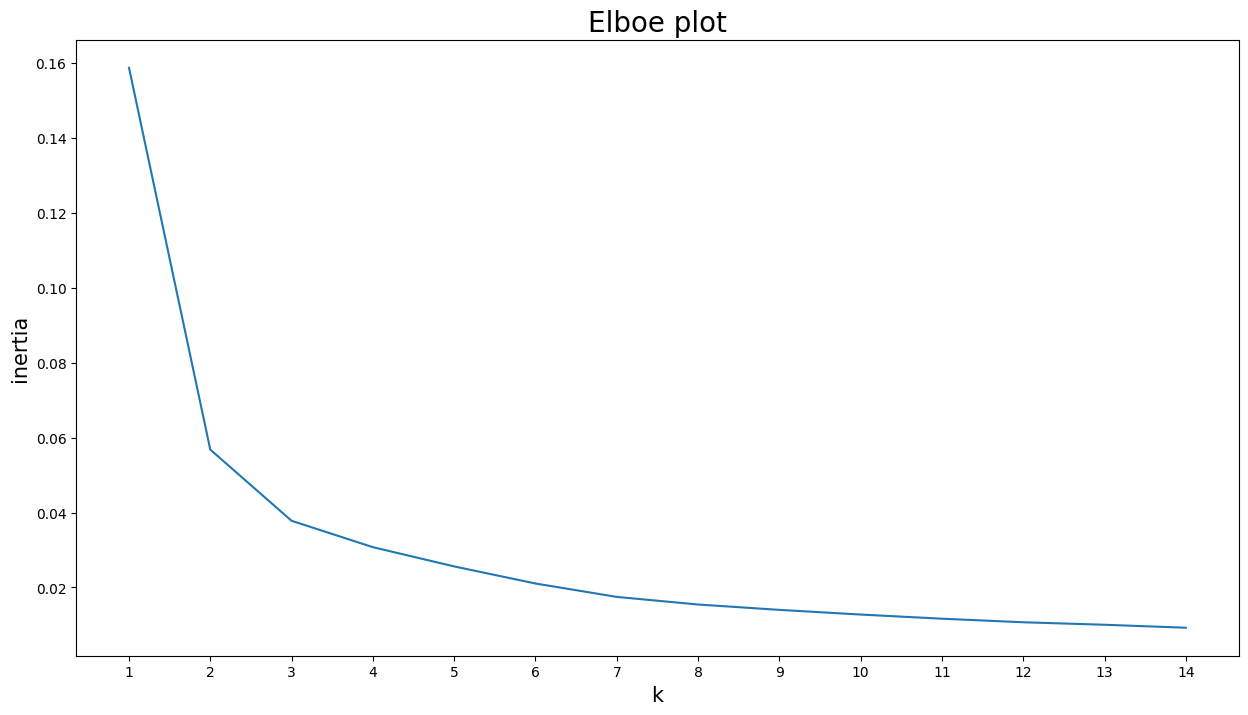

In [15]:
plt.figure(figsize=(15,8))
plt.title('Elboe plot', size=20)
plt.plot(elbow['k'], elbow['inertia'])
plt.xticks(elbow['k'])
plt.xlabel('k', size=15)
plt.ylabel('inertia', size=15)

# Model Building

In [16]:
df = pd.DataFrame()
kmeans = KMeans(n_clusters = 4,  random_state = 42)

y_kmeans = kmeans.fit_predict(data2)

df['y_kmeans']=y_kmeans

df['y_kmeans'].value_counts()

0    446
2    196
3     25
1      4
Name: y_kmeans, dtype: int64

# accuracy check

In [17]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(data2, y_kmeans)
print("Silhouette Coefficient:", silhouette_avg)



Silhouette Coefficient: 0.6649148845503811


# Hierarchical Clustering

In [18]:
data3 = scaled.copy()

In [19]:
import scipy.cluster.hierarchy as shc

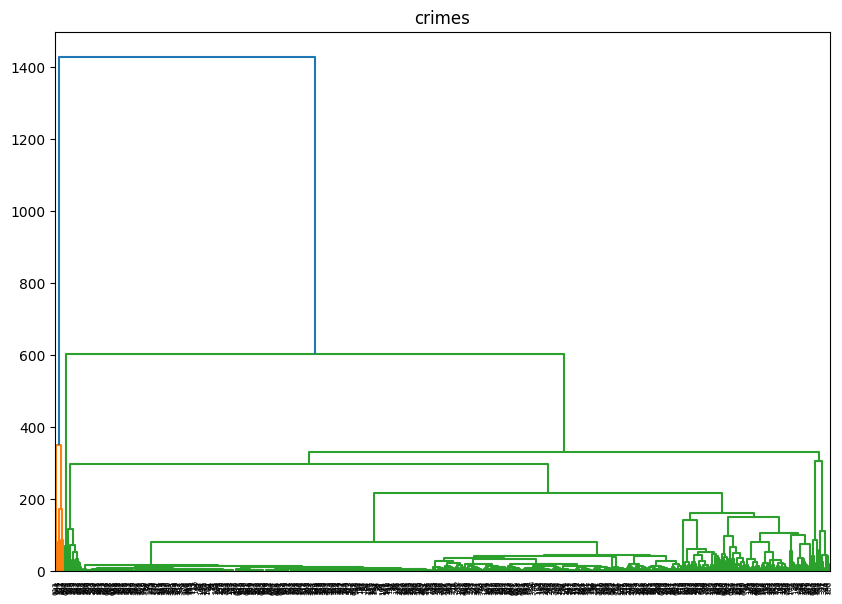

In [20]:
plt.figure(figsize=(10,7))
plt.title('crimes')
dend = shc.dendrogram(shc.linkage(data3, method='ward'))

# model Buidling

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
cluster =  AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [23]:
labels = cluster.fit_predict(data3)

# accuracy check

In [24]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(data3, labels)
print("Silhouette Coefficient:", silhouette_avg)


Silhouette Coefficient: 0.9371740486363059


# merging of files 

In [27]:
as1 = labels.tolist()

In [25]:
data2 = data0.copy()

In [28]:
data2['mean'] = as1

In [29]:
data2

,STATE,Year,RESIDENTIAL Dacoity,RESIDENTIAL Robbery,RESIDENTIAL Burglary,RESIDENTIAL Theft,HIGHWAY Dacoity,HIGHWAY Robbery,HIGHWAY Burglary,HIGHWAY Theft,...,COMMERCIAL Theft,OTHER PLACES Dacoity,OTHER PLACES Robbery,OTHER PLACES Burglary,OTHER PLACES Theft,TOTAL Dacoity,TOTAL Robbery,TOTAL Burglary,TOTAL Theft,mean
0,Andhra Pradesh,2001,100,177,5158,4257,57,172,31,74,...,2502,37,232,862,8849,214,629,7220,16751,0
1,Arunachal Pradesh,2001,9,26,99,131,0,0,0,8,...,54,8,40,65,249,22,84,248,443,0
2,Assam,2001,381,191,1695,2901,46,136,7,87,...,967,77,261,271,1342,532,687,2423,5367,0
3,Bihar,2001,818,326,2486,4741,162,826,0,257,...,686,210,880,505,2582,1291,2203,3233,9701,0
4,Chhattisgarh,2001,54,42,3336,1417,10,38,12,72,...,299,15,239,420,2835,87,338,4144,4812,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,Delhi,2020,2,321,1666,58898,5,1297,7,74524,...,1506,1,295,238,34850,9,1963,2199,177439,0
667,Jammu & Kashmir,2020,0,17,695,475,4,45,55,582,...,494,0,3,58,390,5,70,1136,2064,0
668,Ladakh,2020,0,0,0,2,0,0,0,0,...,0,0,0,3,0,0,0,6,2,0
669,Lakshadweep,2020,0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0


In [30]:
cluster1 = data2[data2['mean']==0]
cluster2 = data2[data2['mean']==1]

In [31]:
cluster1

,STATE,Year,RESIDENTIAL Dacoity,RESIDENTIAL Robbery,RESIDENTIAL Burglary,RESIDENTIAL Theft,HIGHWAY Dacoity,HIGHWAY Robbery,HIGHWAY Burglary,HIGHWAY Theft,...,COMMERCIAL Theft,OTHER PLACES Dacoity,OTHER PLACES Robbery,OTHER PLACES Burglary,OTHER PLACES Theft,TOTAL Dacoity,TOTAL Robbery,TOTAL Burglary,TOTAL Theft,mean
0,Andhra Pradesh,2001,100,177,5158,4257,57,172,31,74,...,2502,37,232,862,8849,214,629,7220,16751,0
1,Arunachal Pradesh,2001,9,26,99,131,0,0,0,8,...,54,8,40,65,249,22,84,248,443,0
2,Assam,2001,381,191,1695,2901,46,136,7,87,...,967,77,261,271,1342,532,687,2423,5367,0
3,Bihar,2001,818,326,2486,4741,162,826,0,257,...,686,210,880,505,2582,1291,2203,3233,9701,0
4,Chhattisgarh,2001,54,42,3336,1417,10,38,12,72,...,299,15,239,420,2835,87,338,4144,4812,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,Delhi,2020,2,321,1666,58898,5,1297,7,74524,...,1506,1,295,238,34850,9,1963,2199,177439,0
667,Jammu & Kashmir,2020,0,17,695,475,4,45,55,582,...,494,0,3,58,390,5,70,1136,2064,0
668,Ladakh,2020,0,0,0,2,0,0,0,0,...,0,0,0,3,0,0,0,6,2,0
669,Lakshadweep,2020,0,0,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0


# Cluster1

In [41]:
import plotly.express as px


state_totals = cluster1.groupby('STATE')['TOTAL Dacoity'].sum().reset_index()

fig = px.bar(state_totals, x='STATE', y='TOTAL Dacoity', height=800)
fig.update_layout(title='Total Dacoity by State', xaxis_title='State', yaxis_title='Total Dacoity')
fig.show()


In [42]:
import plotly.express as px


state_totals = cluster1.groupby('STATE')['TOTAL Burglary'].sum().reset_index()

fig = px.bar(state_totals, x='STATE', y='TOTAL Burglary', height=800)
fig.update_layout(title='TOTAL Burglary by State', xaxis_title='State', yaxis_title='Total Dacoity')
fig.show()

In [43]:
import plotly.express as px


state_totals = cluster1.groupby('STATE')['TOTAL Robbery'].sum().reset_index()

fig = px.bar(state_totals, x='STATE', y='TOTAL Robbery', height=800)
fig.update_layout(title='TOTAL Robbery by State', xaxis_title='State', yaxis_title='Total Dacoity')
fig.show()

In [47]:
import plotly.express as px


state_totals = cluster1.groupby('STATE')['TOTAL Theft'].sum().reset_index()

fig = px.bar(state_totals, x='STATE', y='TOTAL Theft', height=800)
fig.update_layout(title='TOTAL Theft by State', xaxis_title='State', yaxis_title='Total Dacoity')
fig.show()

# Cluster2

In [44]:
import plotly.express as px


state_totals = cluster2.groupby('STATE')['TOTAL Robbery'].sum().reset_index()

fig = px.bar(state_totals, x='STATE', y='TOTAL Robbery', height=800)
fig.update_layout(title='TOTAL Robbery by State', xaxis_title='State', yaxis_title='Total Dacoity')
fig.show()

In [45]:
import plotly.express as px


state_totals = cluster2.groupby('STATE')['TOTAL Burglary'].sum().reset_index()

fig = px.bar(state_totals, x='STATE', y='TOTAL Burglary', height=800)
fig.update_layout(title='TOTAL Burglary by State', xaxis_title='State', yaxis_title='Total Dacoity')
fig.show()

In [46]:
import plotly.express as px

# Group the data by 'STATE' and calculate the sum of 'TOTAL Dacoity' for each state
state_totals = cluster2.groupby('STATE')['TOTAL Dacoity'].sum().reset_index()

fig = px.bar(state_totals, x='STATE', y='TOTAL Dacoity', height=800)
fig.update_layout(title='Total Dacoity by State', xaxis_title='State', yaxis_title='Total Dacoity')
fig.show()

In [48]:
import plotly.express as px


state_totals = cluster1.groupby('STATE')['TOTAL Theft'].sum().reset_index()

fig = px.bar(state_totals, x='STATE', y='TOTAL Theft', height=800)
fig.update_layout(title='TOTAL Theft by State', xaxis_title='State', yaxis_title='Total Dacoity')
fig.show()